<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
import tqdm
import scipy
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

C:\Users\sundararaman\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training/training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
# note the seprator in this file
data_text =pd.read_csv("training/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [4]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [5]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 146.1758642 seconds


In [6]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [7]:
## check null in any columns
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [8]:
# replace the NAN values in text with Gene  +  variation 
result.loc[result.isnull().any(axis=1),'TEXT'] = result['Gene'] + ' ' + result['Variation']

In [9]:
result.iloc[1109]

ID                   1109
Gene                FANCA
Variation          S1088F
Class                   1
TEXT         FANCA S1088F
Name: 1109, dtype: object

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [10]:
## split train and test .Use stratify to y label to preserve the class label propotion  in train and test
x_train,x_test,y_train,y_test = train_test_split(result,result.Class,stratify=result.Class,test_size=0.2)
x_train,x_cv,y_train,y_cv = train_test_split(x_train,x_train.Class,stratify=x_train.Class,test_size=0.2)

In [11]:
print('Data points in the training set ',x_train.shape)
print('Data points in the cv set ',x_cv.shape)
print('Data points in the test set ',x_test.shape)

Data points in the training set  (2124, 5)
Data points in the cv set  (532, 5)
Data points in the test set  (665, 5)


In [12]:
train_distributions = x_train['Class'].value_counts().sort_index()
test_distributions  = x_test['Class'].value_counts().sort_index()
cv_distributions = x_cv['Class'].value_counts().sort_index()


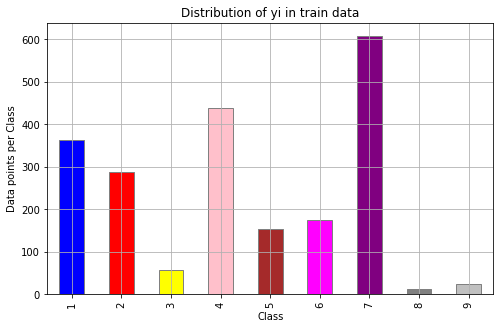

Number of points for class   7   in train:  609 ( 67.667 ) %
Number of points for class   4   in train:  439 ( 48.778 ) %
Number of points for class   1   in train:  363 ( 40.333 ) %
Number of points for class   2   in train:  289 ( 32.111 ) %
Number of points for class   6   in train:  176 ( 19.556 ) %
Number of points for class   5   in train:  155 ( 17.222 ) %
Number of points for class   3   in train:  57 ( 6.333 ) %
Number of points for class   9   in train:  24 ( 2.667 ) %
Number of points for class   8   in train:  12 ( 1.333 ) %


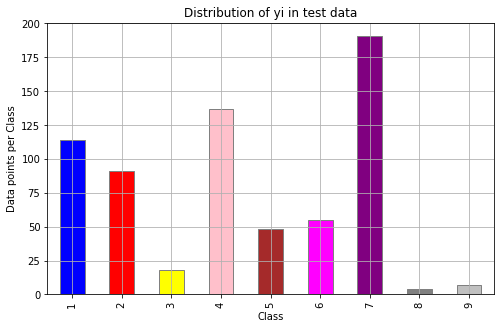

Number of points for class   7   in test:  191 distribution:  ( 21.222 ) %
Number of points for class   4   in test:  137 distribution:  ( 15.222 ) %
Number of points for class   1   in test:  114 distribution:  ( 12.667 ) %
Number of points for class   2   in test:  91 distribution:  ( 10.111 ) %
Number of points for class   6   in test:  55 distribution:  ( 6.111 ) %
Number of points for class   5   in test:  48 distribution:  ( 5.333 ) %
Number of points for class   3   in test:  18 distribution:  ( 2.0 ) %
Number of points for class   9   in test:  7 distribution:  ( 0.778 ) %
Number of points for class   8   in test:  4 distribution:  ( 0.444 ) %


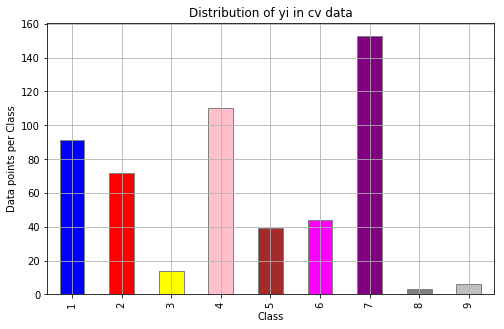

Number of points for class   7   in cv:  153 ( 17.0 ) %
Number of points for class   4   in cv:  110 ( 12.222 ) %
Number of points for class   1   in cv:  91 ( 10.111 ) %
Number of points for class   2   in cv:  72 ( 8.0 ) %
Number of points for class   6   in cv:  44 ( 4.889 ) %
Number of points for class   5   in cv:  39 ( 4.333 ) %
Number of points for class   3   in cv:  14 ( 1.556 ) %
Number of points for class   9   in cv:  6 ( 0.667 ) %
Number of points for class   8   in cv:  3 ( 0.333 ) %


In [13]:
### Plot bar plots for train,test and cv 
plt.figure(figsize=(8,5))
train_distributions.plot(kind='bar',color=['blue','red','yellow','pink','brown','magenta','purple','gray','silver'],
                        edgecolor='gray')

plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()
sorted_i = np.argsort(-train_distributions)
for i in sorted_i:
    print('Number of points for class  ',i+1,' ','in train: ',train_distributions[i+1],
         '(',np.round(train_distributions[i+1]/train_distributions.shape[0],3),')','%')
    
###Plot for test 
plt.figure(figsize=(8,5))
test_distributions.plot(kind='bar',color=['blue','red','yellow','pink','brown','magenta','purple','gray','silver'],
                        edgecolor='gray')

plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()
sorted_i = np.argsort(-test_distributions)
for i in sorted_i:
    print('Number of points for class  ',i+1,' ','in test: ',test_distributions[i+1],'distribution: '
          ,'(',np.round(test_distributions[i+1]/test_distributions.shape[0],3),')','%')
###Plot for cv 
plt.figure(figsize=(8,5))
cv_distributions.plot(kind='bar',color=['blue','red','yellow','pink','brown','magenta','purple','gray','silver'],
                        edgecolor='gray')

plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cv data')
plt.grid()
plt.show()
sorted_i = np.argsort(-cv_distributions)
for i in sorted_i:
    print('Number of points for class  ',i+1,' ','in cv: ',cv_distributions[i+1],
         '(',np.round(cv_distributions[i+1]/cv_distributions.shape[0],3),')','%')    

In [14]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlOrBr", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlOrBr", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlOrBr", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

### 3.2  Building Random Model

In [15]:
### building a random model
## build dictionary to store values 
results = {}
## randomly generating 9 probabilities and dividing each with sum so that the sum = 1  
predicted_cv = np.zeros((x_cv.shape[0],9))
for i in range(len(x_cv)):
    rand = np.random.rand(1,9)
    predicted_cv[i] = (rand/sum(rand[0]))[0]
    
print('The log-loss of cross validation data is: ',log_loss(y_cv,predicted_cv,eps=1e-15) )    

predicted_test = np.zeros((x_test.shape[0],9)) 
for i in range(len(x_test)):
    rand = np.random.rand(1,9)
    predicted_test[i] = (rand/sum(rand[0]))[0]
    
print('The log-loss of test data is: ',log_loss(y_test,predicted_test,eps=1e-15))

predicted_tr = np.zeros((x_train.shape[0],9)) 
for i in range(len(x_train)):
    rand = np.random.rand(1,9)
    predicted_tr[i] = (rand/sum(rand[0]))[0]
    
print('The log-loss of train data is: ',log_loss(y_train,predicted_tr,eps=1e-15))


The log-loss of cross validation data is:  2.46856609154
The log-loss of test data is:  2.45136630277
The log-loss of train data is:  2.49249007868


-------------------- Confusion matrix --------------------


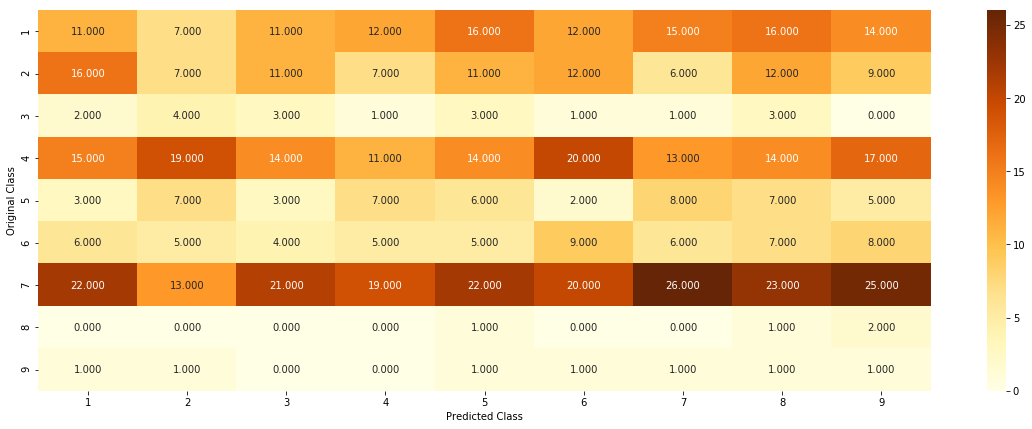

-------------------- Precision matrix (Columm Sum=1) --------------------


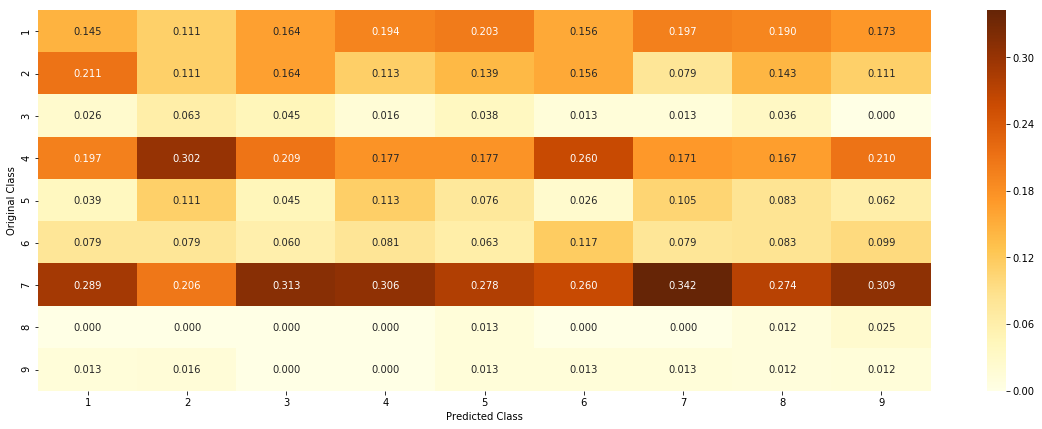

-------------------- Recall matrix (Row sum=1) --------------------


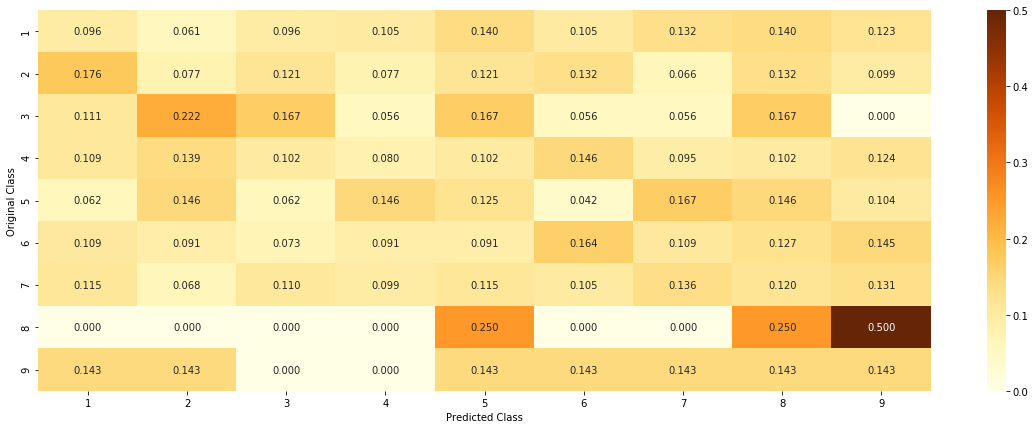

% of misclassified points : 88.722 %


In [16]:
### plot the confusion matix
predicted_y = np.argmax(predicted_test,axis=1) + 1
plot_confusion_matrix(y_test,predicted_y)
mis_cls = round(len(np.nonzero(y_test - predicted_y)[0])*100 /len(y_test),3)
print('% of misclassified points :',mis_cls,'%')
results.update({'1': {'Model' : 'Random',
                      'Train Error':log_loss(y_train,predicted_tr,eps=1e-15),
                                    'Test Error' : log_loss(y_test,predicted_test,eps=1e-15),
                                    'Cv Error':log_loss(y_cv,predicted_cv,eps=1e-15),  
                                    'Misclassification':mis_cls}})

<h2>3.3 Univariate Analysis</h2>

In [17]:
## Response encoding 
## response encoding 
## create a dictionary that returns the probability of each unique value in a feature 
## formula for probability :  number of occurance in each class + 10*alpha /total occurances of value + 90*alpha
def get_gv_feat_dict(feature,alpha):
    '''Returns a dictionary with probalility values of each class 
        keys : unique values of the feature
        value: probability of the value in each class '''
    f_dict={}
    distinct_values = dict(x_train[feature].value_counts())
    for i in distinct_values.keys():
        vect =[]
        for j in range(1,10):  
            class_p = len(x_train.loc[(x_train[feature] == i) & (x_train['Class'] == j)])
            vect.append((class_p + 10*alpha) / (distinct_values[i] + 90*alpha))
        f_dict[i] = vect
    return f_dict
def get_gv_feat(feature,alpha,df):
    '''Iterates over every row of feature.If the value exists in the dictionary
    then '''
    value_count = dict(df[feature].value_counts())
    gv_arr = []
    feat_dict = get_gv_feat_dict(feature,alpha)
    for i,row in df.iterrows():
        if row[feature] in feat_dict.keys() :
            gv_arr.append(feat_dict[row[feature]])
        else:
            gv_arr.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
    return gv_arr        

### 3.3.1 Univariate analysis on Gene Feature

##### 1. What type is  Gene feature ?
       * Categorical
##### 2. Number of unique points in each category ?
             

In [18]:
unique_genes =  x_train['Gene'].value_counts()
print('Number of unique values in Gene:\n',unique_genes.head(10))
print("Number of distinct categories of Gene: ",len(unique_genes) )

Number of unique values in Gene:
 BRCA1     170
EGFR      100
TP53      100
BRCA2      84
PTEN       74
BRAF       62
KIT        52
ERBB2      47
ALK        43
PIK3CA     40
Name: Gene, dtype: int64
Number of distinct categories of Gene:  239


##### 2. How is the Gene feature distributed ? 

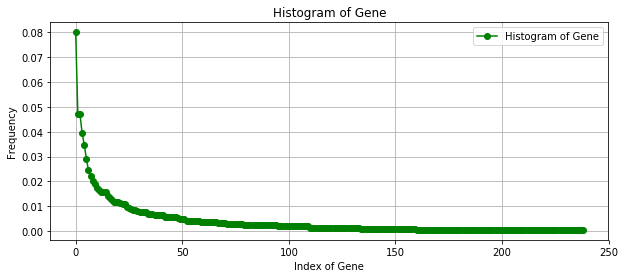

In [19]:
plt.figure(figsize=(10,4))
s = np.sum(unique_genes)
plt.plot(unique_genes.values/s,label = 'Histogram of Gene',marker='o',c='green')
plt.xlabel('Index of Gene')
plt.ylabel('Frequency')
plt.title('Histogram of Gene')
plt.legend()
plt.grid()

##### 2. Cummulative distribution of Gene Feature :

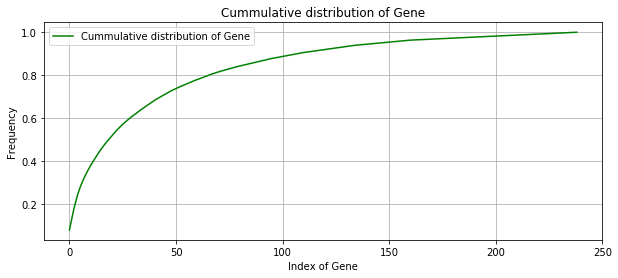

In [20]:
plt.figure(figsize=(10,4))
plt.plot(np.cumsum(unique_genes.values)/s,label = 'Cummulative distribution of Gene',c='green')
plt.xlabel('Index of Gene')
plt.ylabel('Frequency')
plt.title('Cummulative distribution of Gene')
plt.legend()
plt.grid()

##### 3. How to featurize Gene?  
       * Gene can be featurized using: 
           1. response encoding 
           2. one hot encoding
       Select the appropriate featurization based on the model we choose.
       Eg.
       * response encoding can be used in Decision Tree/Random Forests as they perform better in lower dimensional data.
       * One hot encoding can be used in Logistic Regression,SVM algorithms as they work well in higher dimensional data. 

In [21]:
## response encoding on Gene for train,test and cv datset
alpha=1 ## for laplace smoothening
gene_tr_reponse_encode = get_gv_feat('Gene',alpha,x_train)
gene_te_reponse_encode = get_gv_feat('Gene',alpha,x_test)
gene_cv_reponse_encode = get_gv_feat('Gene',alpha,x_cv)
print('Shape after response encoding of Gene using Train data ','(',len(gene_tr_reponse_encode),',',
      len(gene_tr_reponse_encode[0]),')')
print('Shape after response encoding of Gene using Test data ','(',len(gene_te_reponse_encode),',',
      len(gene_te_reponse_encode[0]),')')
print('Shape after response encoding of Gene using Cv data ','(',len(gene_cv_reponse_encode),',',
      len(gene_cv_reponse_encode[0]),')')

Shape after response encoding of Gene using Train data  ( 2124 , 9 )
Shape after response encoding of Gene using Test data  ( 665 , 9 )
Shape after response encoding of Gene using Cv data  ( 532 , 9 )


In [22]:
## One Hot encoding on Gene for train,test and cv datset
ohe =  CountVectorizer()
ohe_tr_gene = ohe.fit_transform(x_train['Gene'])
ohe_te_gene = ohe.transform(x_test['Gene'])
ohe_cv_gene = ohe.transform(x_cv['Gene'])

In [23]:
print('Shape after one hot encoding of Gene using Train data ',ohe_tr_gene.shape)
print('Shape after one hot encoding of Gene using Test data ',ohe_te_gene.shape)
print('Shape after one hot encoding of Gene using Cv data ',ohe_cv_gene.shape)

Shape after one hot encoding of Gene using Train data  (2124, 238)
Shape after one hot encoding of Gene using Test data  (665, 238)
Shape after one hot encoding of Gene using Cv data  (532, 238)


##### 4. How to know if the feature Gene is useful   in predicting y_i?
      1.One method is to train a popular Logistic Regression model with only one hot encoded Gene feature and see how it 
      predicts yi .

SGD classifier trained with alpha: 1e-05 with Log-Loss:  1.2289928991
SGD classifier trained with alpha: 0.0001 with Log-Loss:  1.213959138
SGD classifier trained with alpha: 0.001 with Log-Loss:  1.2617974835
SGD classifier trained with alpha: 0.01 with Log-Loss:  1.38520246297
SGD classifier trained with alpha: 0.1 with Log-Loss:  1.4777911028
SGD classifier trained with alpha: 1 with Log-Loss:  1.50796057234
**************************************************
Best alpha which gives minimum log loss is :  0.0001
**************************************************


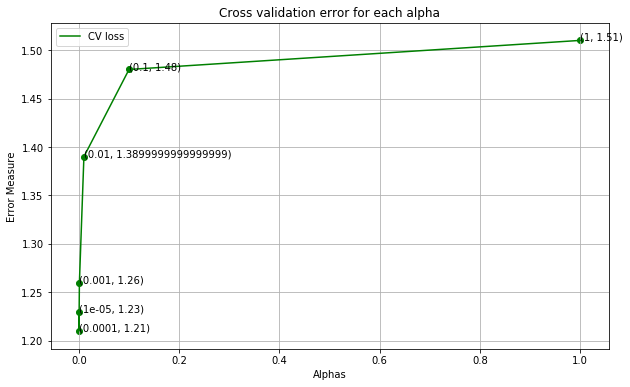

SGD classifier trained with best alpha: 0.0001 with Train Log-Loss:  0.986692143546
SGD classifier trained with best alpha: 0.0001 with Test Log-Loss:  1.15089347045
SGD classifier trained with best alpha: 0.0001 with CV Log-Loss:  1.213959138


In [24]:
alpha = [10 ** i for i in range(-5,1)]
cv_loss=[]
for i in alpha:
    LR = SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=34)
    LR.fit(ohe_tr_gene,y_train)
    sig_clf = CalibratedClassifierCV(LR,method='sigmoid') 
    sig_clf.fit(ohe_tr_gene,y_train)
    predict_y = sig_clf.predict_proba(ohe_cv_gene)
    cv_loss.append(log_loss(y_cv,predict_y,labels=LR.classes_,eps=1e-15))
    print('SGD classifier trained with alpha:',i,'with Log-Loss: ',log_loss(y_cv,predict_y,labels=LR.classes_,eps=1e-15))
### hyper parameter tuning 
best_alpha = alpha[np.argmin(cv_loss)]
print('*'*50)
print('Best alpha which gives minimum log loss is : ',best_alpha)
print('*'*50)

## Plot the cv loss on different alphas
plt.figure(figsize=(10,6))
round_loss = np.round(cv_loss,2)
plt.plot(alpha,round_loss,label='CV loss',c='g')
plt.scatter(alpha,round_loss,c='g')
for ii in zip(alpha,round_loss):
    plt.annotate(ii,ii)
plt.grid()
plt.xlabel('Alphas')
plt.ylabel('Error Measure')
plt.title("Cross validation error for each alpha")
plt.legend()
plt.show()

## training the model with the best hyperparameter
LR = SGDClassifier(alpha=best_alpha,penalty='l2',loss='log',random_state=34)
LR.fit(ohe_tr_gene,y_train)
sig_clf = CalibratedClassifierCV(LR,method='sigmoid') 
sig_clf.fit(ohe_tr_gene,y_train)
predict_tr = sig_clf.predict_proba(ohe_tr_gene)
predict_te = sig_clf.predict_proba(ohe_te_gene)
predict_cv = sig_clf.predict_proba(ohe_cv_gene)

print('SGD classifier trained with best alpha:',best_alpha,'with Train Log-Loss: ',log_loss(y_train,predict_tr,labels=LR.classes_,eps=1e-15))
print('SGD classifier trained with best alpha:',best_alpha,'with Test Log-Loss: ',log_loss(y_test,predict_te,labels=LR.classes_,eps=1e-15))
print('SGD classifier trained with best alpha:',best_alpha,'with CV Log-Loss: ',log_loss(y_cv,predict_cv,labels=LR.classes_,eps=1e-15))

### Observations :
    * We can see that training the model with only gene feature makes a significant impact on predicting the 
       y label.The loss is reduced  to 1.17 when compared to random model with loss of 2.5 

##### 5.Stabililty of Gene Feature across (Train,Test,CV)
       * The gene feature is stable across all the dataset.Otherwise, the CV and Test errors would be significantly more 
       than train error

In [25]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=x_test[x_test['Gene'].isin(list(set(x_train['Gene'])))].shape[0]
cv_coverage=x_cv[x_cv['Gene'].isin(list(set(x_train['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',x_test.shape[0], ":",(test_coverage/x_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',x_cv.shape[0],":" ,(cv_coverage/x_cv.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  239  genes in train dataset?
Ans
1. In test data 656 out of 665 : 98.64661654135338
2. In cross validation data 516 out of  532 : 96.99248120300751


### 3.3.2 Univariate analysis on Variation Feature

##### 1. What type is  Variation feature ?
       * Categorical
##### 2. Number of unique points in each category ?
             

In [26]:
unique_variation =  x_train['Variation'].value_counts()
print('Number of unique values in Variation:\n',unique_variation.head(10))
print("Number of distinct categories of Variation: ",len(unique_variation) )

Number of unique values in Variation:
 Truncating Mutations    63
Deletion                50
Amplification           44
Fusions                 22
Overexpression           6
G12V                     4
E17K                     3
Q61L                     2
Q61H                     2
G12A                     2
Name: Variation, dtype: int64
Number of distinct categories of Variation:  1921


##### 2. How is the Variation feature distributed ? 

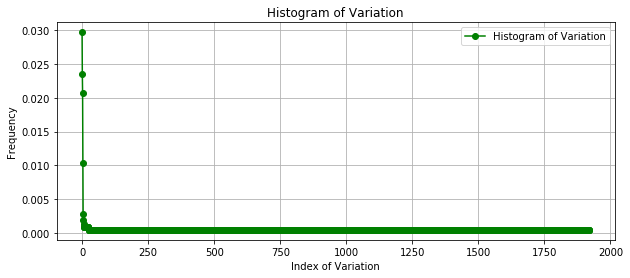

In [27]:
plt.figure(figsize=(10,4))
s = np.sum(unique_variation)
plt.plot(unique_variation.values/s,label = 'Histogram of Variation',marker='o',c='green')
plt.xlabel('Index of Variation')
plt.ylabel('Frequency')
plt.title('Histogram of Variation')
plt.legend()
plt.grid()

##### 2. Cummulative distribution of Variation Feature :

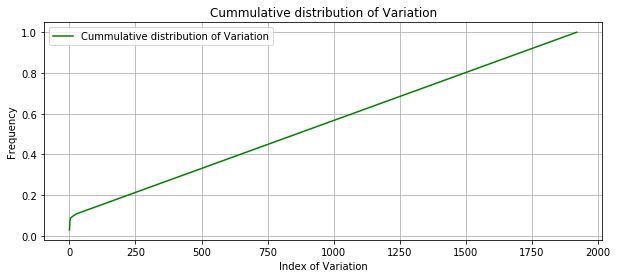

In [28]:
plt.figure(figsize=(10,4))
plt.plot(np.cumsum(unique_variation.values)/s,label = 'Cummulative distribution of Variation',c='green')
plt.xlabel('Index of Variation')
plt.ylabel('Frequency')
plt.title('Cummulative distribution of Variation')
plt.legend()
plt.grid()

##### 3. How to featurize Variation?  
       * Variation can be featurized using: 
           1. response encoding 
           2. one hot encoding
       Select the appropriate featurization based on the model we choose.
       Eg.
       * response encoding can be used in Decision Tree/Random Forests as they perform better in lower dimensional data.
       * One hot encoding can be used in Logistic Regression,SVM algorithms as they work well in higher dimensional data. 

In [29]:
## response encoding on variation for train,test and cv datset
alpha=1 ## for laplace smoothening
variation_tr_reponse_encode = get_gv_feat('Variation',alpha,x_train)
variation_te_reponse_encode = get_gv_feat('Variation',alpha,x_test)
variation_cv_reponse_encode = get_gv_feat('Variation',alpha,x_cv)
print('Shape after response encoding of variation using Train data ','(',len(variation_tr_reponse_encode),',',
      len(variation_tr_reponse_encode[0]),')')
print('Shape after response encoding of variation using Test data ','(',len(variation_te_reponse_encode),',',
      len(variation_te_reponse_encode[0]),')')
print('Shape after response encoding of variation using Cv data ','(',len(variation_cv_reponse_encode),',',
      len(variation_cv_reponse_encode[0]),')')

Shape after response encoding of variation using Train data  ( 2124 , 9 )
Shape after response encoding of variation using Test data  ( 665 , 9 )
Shape after response encoding of variation using Cv data  ( 532 , 9 )


In [30]:
## One Hot encoding on variation for train,test and cv datset
ohe =  CountVectorizer()
ohe_tr_variation = ohe.fit_transform(x_train['Variation'])
ohe_te_variation = ohe.transform(x_test['Variation'])
ohe_cv_variation = ohe.transform(x_cv['Variation'])

In [31]:
print('Shape after one hot encoding of Variation using Train data ',ohe_tr_variation.shape)
print('Shape after one hot encoding of Variation using Test data ',ohe_te_variation.shape)
print('Shape after one hot encoding of Variation using Cv data ',ohe_cv_variation.shape)

Shape after one hot encoding of Variation using Train data  (2124, 1956)
Shape after one hot encoding of Variation using Test data  (665, 1956)
Shape after one hot encoding of Variation using Cv data  (532, 1956)


##### 4. How to know if the feature Variation is useful   in predicting y_i?
      1.One method is to train a popular Logistic Regression model with only one hot encoded vaiation feature and see how it 
      predicts yi .

SGD classifier trained with alpha: 1e-05 with Log-Loss:  1.68044012227
SGD classifier trained with alpha: 0.0001 with Log-Loss:  1.67369685663
SGD classifier trained with alpha: 0.001 with Log-Loss:  1.67600089034
SGD classifier trained with alpha: 0.01 with Log-Loss:  1.69057582469
SGD classifier trained with alpha: 0.1 with Log-Loss:  1.70516739891
SGD classifier trained with alpha: 1 with Log-Loss:  1.70665746135
**************************************************
Best alpha which gives minimum log loss is :  0.0001
**************************************************


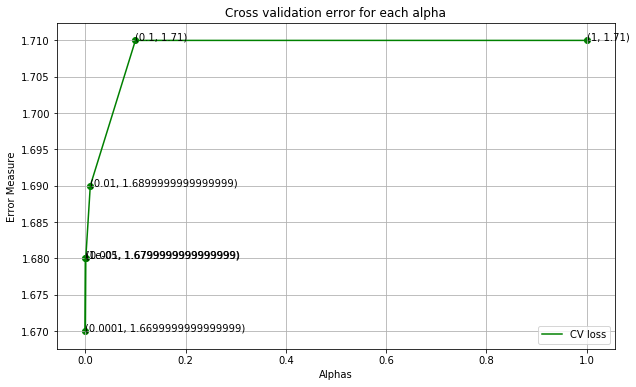

SGD classifier trained with best alpha: 0.0001 with Train Log-Loss:  0.73091527661
SGD classifier trained with best alpha: 0.0001 with Test Log-Loss:  1.7044480813
SGD classifier trained with best alpha: 0.0001 with CV Log-Loss:  1.67369685663


In [32]:
alpha = [10 ** i for i in range(-5,1)]
cv_loss=[]
for i in alpha:
    LR = SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=34)
    LR.fit(ohe_tr_variation,y_train)
    sig_clf = CalibratedClassifierCV(LR,method='sigmoid') 
    sig_clf.fit(ohe_tr_variation,y_train)
    predict_y = sig_clf.predict_proba(ohe_cv_variation)
    cv_loss.append(log_loss(y_cv,predict_y,labels=LR.classes_,eps=1e-15))
    print('SGD classifier trained with alpha:',i,'with Log-Loss: ',log_loss(y_cv,predict_y,labels=LR.classes_,eps=1e-15))
### hyper parameter tuning 
best_alpha = alpha[np.argmin(cv_loss)]
print('*'*50)
print('Best alpha which gives minimum log loss is : ',best_alpha)
print('*'*50)

## Plot the cv loss on different alphas
plt.figure(figsize=(10,6))
round_loss = np.round(cv_loss,2)
plt.plot(alpha,round_loss,label='CV loss',c='g')
plt.scatter(alpha,round_loss,c='g')
for ii in zip(alpha,round_loss):
    plt.annotate(ii,ii)
plt.grid()
plt.xlabel('Alphas')
plt.ylabel('Error Measure')
plt.title("Cross validation error for each alpha")
plt.legend()
plt.show()

## training the model with the best hyperparameter
LR = SGDClassifier(alpha=best_alpha,penalty='l2',loss='log',random_state=34)
LR.fit(ohe_tr_variation,y_train)
sig_clf = CalibratedClassifierCV(LR,method='sigmoid') 
sig_clf.fit(ohe_tr_variation,y_train)
predict_tr = sig_clf.predict_proba(ohe_tr_variation)
predict_te = sig_clf.predict_proba(ohe_te_variation)
predict_cv = sig_clf.predict_proba(ohe_cv_variation)

print('SGD classifier trained with best alpha:',best_alpha,'with Train Log-Loss: ',log_loss(y_train,predict_tr,labels=LR.classes_,eps=1e-15))
print('SGD classifier trained with best alpha:',best_alpha,'with Test Log-Loss: ',log_loss(y_test,predict_te,labels=LR.classes_,eps=1e-15))
print('SGD classifier trained with best alpha:',best_alpha,'with CV Log-Loss: ',log_loss(y_cv,predict_cv,labels=LR.classes_,eps=1e-15))

### Observations :
    * We can see that training the model with only variation feature makes a significant impact on predicting the 
       y label.The loss is reduced  to 1.69 when compared to random model with loss of 2.5 
    * However Gene feature reduces error better than variation feature.

##### 5.Stabililty of Variation Feature across (Train,Test,CV)


In [33]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_variation.shape[0], " variation in train dataset?")

test_coverage=x_test[x_test['Variation'].isin(list(set(x_train['Variation'])))].shape[0]
cv_coverage=x_cv[x_cv['Variation'].isin(list(set(x_train['Variation'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',x_test.shape[0], ":",(test_coverage/x_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',x_cv.shape[0],":" ,(cv_coverage/x_cv.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  1921  variation in train dataset?
Ans
1. In test data 62 out of 665 : 9.323308270676693
2. In cross validation data 55 out of  532 : 10.338345864661653


* The variation feature is not stable across all the dataset.The CV and Test errors is significantly more than train error and we see that only 9% of data points of variation in train are covered in the CV and test.

<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [34]:
## lets create a dictionary which stores the count of words in the text
def get_word_dict(data):
    word_dict = defaultdict(int)
    for i,row in data.iterrows():
        for word in row['TEXT'].split() :
            word_dict[word]+=1
    return word_dict

### Function to get response vector for the text feature
def get_response_vectors(data):
    resp_vector=np.zeros((data.shape[0],9))
    for i in range(0,9):
        for index,row in data.reset_index().iterrows():
            sum_prob = 0 
            for word in row['TEXT'].split() :
                sum_prob += math.log(((cl_list[i][word]+10) / (total_list[word] + 90)))
            resp_vector[index][i] = math.exp(sum_prob/len(row['TEXT'].split()))   
    return resp_vector
cl_list=[]
total_list=[]
for i in range(1,10):
    data = get_word_dict(x_train[x_train['Class'] == i])
    cl_list.append(data)
total_list = get_word_dict(x_train)

response_en_tr_text = get_response_vectors(x_train)
response_en_te_text = get_response_vectors(x_test)
response_en_cv_text = get_response_vectors(x_cv)

In [35]:
response_en_tr_text = (response_en_tr_text.T/response_en_tr_text.sum(axis=1)).T
response_en_te_text = (response_en_te_text.T/response_en_te_text.sum(axis=1)).T
response_en_cv_text = (response_en_cv_text.T/response_en_cv_text.sum(axis=1)).T

In [36]:
## convert to csr matrix
response_en_tr_text = scipy.sparse.csr_matrix(response_en_tr_text)
response_en_te_text = scipy.sparse.csr_matrix(response_en_te_text)
response_en_cv_text = scipy.sparse.csr_matrix(response_en_cv_text)

In [37]:
## one hot encoding of text feature using TFIDF
tfidf = TfidfVectorizer(max_features=1000)
tfidf.fit(x_train['TEXT'])
tfidf_tr_ohe = tfidf.transform(x_train['TEXT'])
tfidf_te_ohe = tfidf.transform(x_test['TEXT'])
tfidf_cv_ohe = tfidf.transform(x_cv['TEXT'])

In [38]:
## BOW on TEXT features including unigrams and bigrams
bow = CountVectorizer(min_df=3,ngram_range = (1,2))
bow.fit(x_train['TEXT'])
bow_tr_ohe = bow.transform(x_train['TEXT'])
bow_te_ohe = bow.transform(x_test['TEXT'])
bow_cv_ohe = bow.transform(x_cv['TEXT'])

In [39]:
print('Shape after vectorizing train data using TFIDF :',tfidf_tr_ohe.shape)
print('Shape after vectorizing test data using TFIDF :',tfidf_te_ohe.shape)
print('Shape after vectorizing CV data using TFIDF :',tfidf_cv_ohe.shape)
print('Shape after vectorizing train data using Bag Of Words :',bow_tr_ohe.shape)
print('Shape after vectorizing test data using Bag Of Words :',bow_te_ohe.shape)
print('Shape after vectorizing CV data using Bag Of Words :',bow_cv_ohe.shape)

Shape after vectorizing train data using TFIDF : (2124, 1000)
Shape after vectorizing test data using TFIDF : (665, 1000)
Shape after vectorizing CV data using TFIDF : (532, 1000)
Shape after vectorizing train data using Bag Of Words : (2124, 777632)
Shape after vectorizing test data using Bag Of Words : (665, 777632)
Shape after vectorizing CV data using Bag Of Words : (532, 777632)


In [40]:
# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = bow_tr_ohe.sum(axis=0).A1
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(bow.get_feature_names()),train_text_fea_counts))

#### 1. Number of Unique words present in the train data including uni gram and bi gram and considering the words that occur in min 10 doc.


In [41]:
print(''' Number of Unique words present in the train data including uni gram and bi gram 
       considering the words that occur in min 3 doc : ''',len(bow.get_feature_names()))

 Number of Unique words present in the train data including uni gram and bi gram 
       considering the words that occur in min 3 doc :  777632


In [42]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [43]:
## Number of words of a given frequency
freq_cnter = Counter(sorted_text_occur)
print(Counter(sorted_text_occur))

Counter({3: 156412, 4: 100589, 5: 80655, 6: 57416, 8: 44742, 7: 36087, 9: 32757, 10: 24329, 11: 23121, 13: 18299, 12: 16742, 14: 14938, 16: 11895, 15: 10469, 17: 8531, 18: 7436, 20: 6253, 19: 5455, 24: 5156, 25: 4949, 21: 4736, 22: 4425, 36: 4416, 23: 4236, 26: 3689, 31: 3556, 43: 3233, 27: 3134, 28: 2925, 30: 2392, 32: 2357, 50: 2327, 29: 2265, 33: 2068, 34: 1790, 37: 1768, 35: 1673, 38: 1624, 40: 1586, 39: 1495, 44: 1401, 73: 1348, 41: 1253, 42: 1217, 45: 1208, 48: 1159, 61: 1122, 46: 1089, 47: 980, 51: 979, 52: 937, 49: 908, 53: 791, 55: 766, 72: 756, 54: 740, 62: 714, 56: 710, 57: 676, 60: 638, 58: 630, 63: 623, 59: 593, 74: 566, 64: 564, 65: 558, 66: 548, 75: 504, 70: 476, 69: 455, 68: 446, 67: 445, 78: 427, 76: 427, 77: 420, 71: 397, 79: 389, 84: 371, 80: 371, 81: 355, 82: 345, 86: 344, 83: 320, 87: 308, 90: 305, 85: 298, 89: 291, 92: 284, 91: 280, 88: 279, 100: 276, 93: 251, 95: 245, 96: 237, 108: 230, 99: 225, 94: 221, 102: 219, 97: 218, 104: 217, 106: 204, 103: 202, 101: 191, 

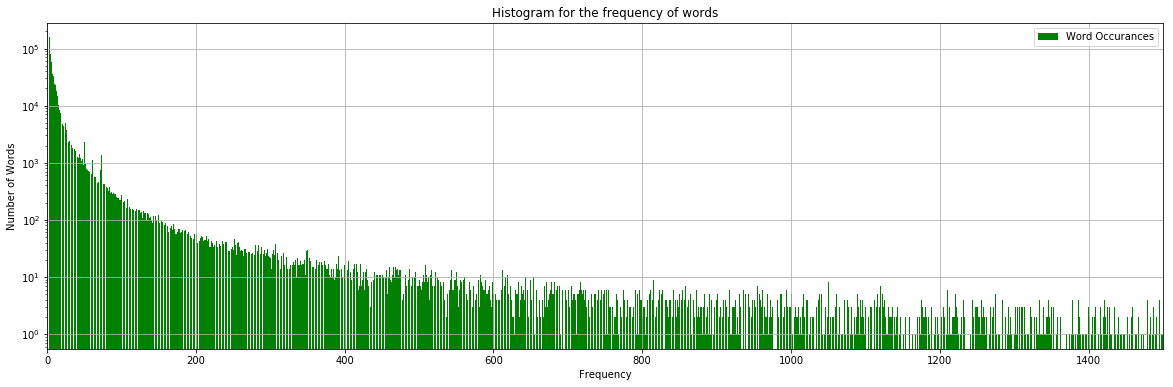

In [44]:
## lets zoom in and view until the frequency from (0,1500)
plt.figure(figsize=(20,6))
plt.bar(freq_cnter.keys(),freq_cnter.values(),label='Word Occurances',color='g')
plt.xlabel('Frequency')
plt.ylabel('Number of Words')
plt.title('Histogram for the frequency of words')
plt.xlim(0,1500)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.grid()

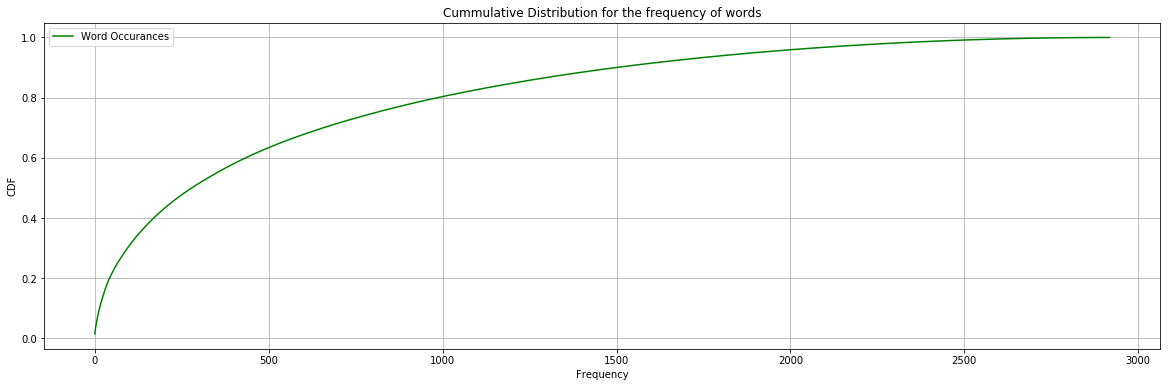

In [45]:
plt.figure(figsize=(20,6))
s = sum(freq_cnter.keys()) 
plt.plot(np.cumsum(list(freq_cnter.keys()))/s,label='Word Occurances',c='g')
plt.xlabel('Frequency')
plt.ylabel('CDF')
plt.title('Cummulative Distribution for the frequency of words')
plt.legend()
plt.grid()


#### 4. How good is Text feature in predicting yi

SGD classifier trained with alpha: 1e-05 with Log-Loss:  1.10419114824
SGD classifier trained with alpha: 0.0001 with Log-Loss:  1.09361032832
SGD classifier trained with alpha: 0.001 with Log-Loss:  1.20597291205
SGD classifier trained with alpha: 0.01 with Log-Loss:  1.39586365499
SGD classifier trained with alpha: 0.1 with Log-Loss:  1.61223504614
SGD classifier trained with alpha: 1 with Log-Loss:  1.68110857444
**************************************************
Best alpha which gives minimum log loss is :  0.0001
**************************************************


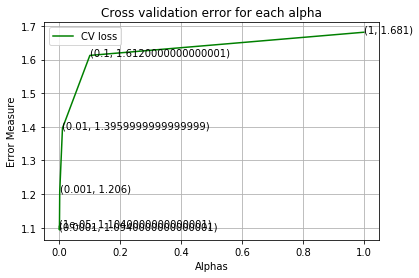

SGD classifier trained with best alpha: 0.0001 with Train Log-Loss:  0.835891101493
SGD classifier trained with best alpha: 0.0001 with Test Log-Loss:  1.05717377378
SGD classifier trained with best alpha: 0.0001 with CV Log-Loss:  1.09361032832


In [46]:
alpha = [10 ** i for i in range(-5,1)]
cv_loss=[]
for i in alpha:
    LR = SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=34)
    LR.fit(tfidf_tr_ohe,y_train)
    sig_clf = CalibratedClassifierCV(LR,method='sigmoid') 
    sig_clf.fit(tfidf_tr_ohe,y_train)
    predict_y = sig_clf.predict_proba(tfidf_cv_ohe)
    cv_loss.append(log_loss(y_cv,predict_y,labels=LR.classes_,eps=1e-15))
    print('SGD classifier trained with alpha:',i,'with Log-Loss: ',log_loss(y_cv,predict_y,labels=LR.classes_,eps=1e-15))
### hyper parameter tuning 
best_alpha = alpha[np.argmin(cv_loss)]
print('*'*50)
print('Best alpha which gives minimum log loss is : ',best_alpha)
print('*'*50)

## Plot the cv loss on different alphas
fig,ax=plt.subplots()
ax.plot(alpha,cv_loss,label='CV loss',c='g')
for i,loss in enumerate(np.round(cv_loss,3)):
    ax.annotate((alpha[i],np.round(loss,3)), (alpha[i],cv_loss[i]))
plt.grid()
plt.xlabel('Alphas')
plt.ylabel('Error Measure')
plt.title("Cross validation error for each alpha")
plt.legend()
plt.show()

## training the model with the best hyperparameter
LR = SGDClassifier(alpha=best_alpha,penalty='l2',loss='log',random_state=34)
LR.fit(tfidf_tr_ohe,y_train)
sig_clf = CalibratedClassifierCV(LR,method='sigmoid') 
sig_clf.fit(tfidf_tr_ohe,y_train)
predict_tr = sig_clf.predict_proba(tfidf_tr_ohe)
predict_te = sig_clf.predict_proba(tfidf_te_ohe)
predict_cv = sig_clf.predict_proba(tfidf_cv_ohe)

print('SGD classifier trained with best alpha:',best_alpha,'with Train Log-Loss: ',log_loss(y_train,predict_tr,labels=LR.classes_,eps=1e-15))
print('SGD classifier trained with best alpha:',best_alpha,'with Test Log-Loss: ',log_loss(y_test,predict_te,labels=LR.classes_,eps=1e-15))
print('SGD classifier trained with best alpha:',best_alpha,'with CV Log-Loss: ',log_loss(y_cv,predict_cv,labels=LR.classes_,eps=1e-15))

#####  5.Stability of Text Feature 

In [47]:
def intersection_words(df):
    txt_feat =  TfidfVectorizer(min_df = 3)
    txt_feat.fit_transform(df)
    features =  set(txt_feat.get_feature_names())
    tr_feat = set(tfidf.get_feature_names())
    comm_features = tr_feat & features
    return len(comm_features)/len(tr_feat) * 100

In [48]:
### how much percentage of words the train,cv and test are overlapping
cv_coverage = intersection_words(x_cv['TEXT'])
test_coverage = intersection_words(x_test['TEXT'])
print('How many words in the train data are also present in the Test and Cross validation data ? ')
print(test_coverage,'% of the train words are retained in the train data')
print(cv_coverage,'% of the cv words are retained in the train data')

How many words in the train data are also present in the Test and Cross validation data ? 
100.0 % of the train words are retained in the train data
100.0 % of the cv words are retained in the train data


<h1>4. Machine Learning Models</h1>

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [49]:
### prepare dataset using tfidf vectorizing for text and one hot encoding for categorical features
x_tr_tfidf_onehotencoding = hstack((ohe_tr_gene,ohe_tr_variation,tfidf_tr_ohe)).tocsr()
x_te_tfidf_onehotencoding = hstack((ohe_te_gene,ohe_te_variation,tfidf_te_ohe)).tocsr() 
x_cv_tfidf_onehotencoding = hstack((ohe_cv_gene,ohe_cv_variation,tfidf_cv_ohe)).tocsr()

### prepare dataset using tfidf vectorizing for text and response coding for categorical features
x_tr_tfidf_responsencoding = hstack((gene_tr_reponse_encode,variation_tr_reponse_encode,response_en_tr_text)).tocsr()
x_te_tfidf_responsencoding = hstack((gene_te_reponse_encode,variation_te_reponse_encode,response_en_te_text)).tocsr() 
x_cv_tfidf_responsencoding = hstack((gene_cv_reponse_encode,variation_cv_reponse_encode,response_en_cv_text)).tocsr()

## prepare dataset using bag of words vectorizing and one hot encoding for categorical features
x_tr_bow_onehotencoding = hstack((ohe_tr_gene,ohe_tr_variation,bow_tr_ohe)).tocsr()
x_te_bow_onehotencoding = hstack((ohe_te_gene,ohe_te_variation,bow_te_ohe)).tocsr() 
x_cv_bow_onehotencoding = hstack((ohe_cv_gene,ohe_cv_variation,bow_cv_ohe)).tocsr()

### prepare dataset using tfidf vectorizing for text and response coding for categorical features
x_tr_bow_responsencoding = hstack((gene_tr_reponse_encode,variation_tr_reponse_encode,response_en_tr_text)).tocsr()
x_te_bow_responsencoding = hstack((gene_te_reponse_encode,variation_te_reponse_encode,response_en_te_text)).tocsr() 
x_cv_bow_responsencoding = hstack((gene_cv_reponse_encode,variation_cv_reponse_encode,response_en_cv_text)).tocsr()

In [50]:
print('Shape of train dataset after one hot encoding and vectorizing using TFIDF',x_tr_tfidf_onehotencoding.shape)
print('Shape of test dataset after one hot encoding and vectorizing using TFIDF',x_te_tfidf_onehotencoding.shape)
print('Shape of cv dataset after one hot encoding and vectorizing using TFIDF',x_cv_tfidf_onehotencoding.shape)
print('*'*100)
print('Shape of train dataset after response encoding and vectorizing using TFIDF',x_tr_tfidf_responsencoding.shape)
print('Shape of test dataset after response encoding and vectorizing using TFIDF',x_te_tfidf_responsencoding.shape)
print('Shape of cv dataset after response encoding and vectorizing using TFIDF',x_cv_tfidf_responsencoding.shape)
print('*'*100)
print('Shape of train dataset after one hot encoding and vectorizing using BOW',x_tr_bow_onehotencoding.shape)
print('Shape of test dataset after one hot encoding and vectorizing using BOW',x_te_bow_onehotencoding.shape)
print('Shape of cv dataset after one hot encoding and vectorizing using BOW',x_cv_bow_onehotencoding.shape)
print('*'*100)
print('Shape of train dataset after response encoding and vectorizing using BOW',x_tr_bow_responsencoding.shape)
print('Shape of test dataset after response encoding and vectorizing using BOW',x_te_bow_responsencoding.shape)
print('Shape of cv dataset after response encoding and vectorizing using BOW',x_cv_bow_responsencoding.shape)
print('*'*100)

Shape of train dataset after one hot encoding and vectorizing using TFIDF (2124, 3194)
Shape of test dataset after one hot encoding and vectorizing using TFIDF (665, 3194)
Shape of cv dataset after one hot encoding and vectorizing using TFIDF (532, 3194)
****************************************************************************************************
Shape of train dataset after response encoding and vectorizing using TFIDF (2124, 27)
Shape of test dataset after response encoding and vectorizing using TFIDF (665, 27)
Shape of cv dataset after response encoding and vectorizing using TFIDF (532, 27)
****************************************************************************************************
Shape of train dataset after one hot encoding and vectorizing using BOW (2124, 779826)
Shape of test dataset after one hot encoding and vectorizing using BOW (665, 779826)
Shape of cv dataset after one hot encoding and vectorizing using BOW (532, 779826)
************************************

<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

Multinomial Naive Byes trained with alpha  1e-05  with a log_loss of 1.22095262063
Multinomial Naive Byes trained with alpha  0.0001  with a log_loss of 1.21872181388
Multinomial Naive Byes trained with alpha  0.001  with a log_loss of 1.21535934194
Multinomial Naive Byes trained with alpha  0.01  with a log_loss of 1.20987537078
Multinomial Naive Byes trained with alpha  0.1  with a log_loss of 1.21616401302
Multinomial Naive Byes trained with alpha  1  with a log_loss of 1.24660502842
Multinomial Naive Byes trained with alpha  10  with a log_loss of 1.30491508258
Multinomial Naive Byes trained with alpha  100  with a log_loss of 1.33171899022
Multinomial Naive Byes trained with alpha  1000  with a log_loss of 1.33926490737


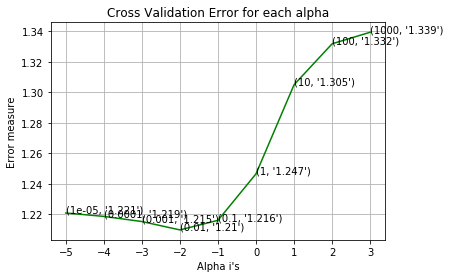

For values of best alpha =  0.01 The train log loss is: 0.547532151534
For values of best alpha =  0.01 The test log loss is: 1.18674229618
For values of best alpha =  0.01 The cross validation log loss is: 1.20987537078


In [51]:
alpha = [10 ** i for i in range(-5,4)]
cv_log_error = []
for i in alpha :
    MB = MultinomialNB(alpha=i)
    ## trained after tfidf vectorizing on text data
    MB.fit(x_tr_tfidf_onehotencoding,y_train)
    calib_mb = CalibratedClassifierCV(MB,method='sigmoid')
    calib_mb.fit(x_tr_tfidf_onehotencoding,y_train)
    predict_cv = calib_mb.predict_proba(x_cv_tfidf_onehotencoding)
    print('Multinomial Naive Byes trained with alpha ',i,' with a log_loss of',log_loss(y_cv,predict_cv,
                                                                 labels=calib_mb.classes_, eps=1e-15))
    cv_log_error.append(log_loss(y_cv,predict_cv,labels=calib_mb.classes_, eps=1e-15))
    
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error,c='g')
for i, txt in enumerate(np.round(cv_log_error,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


### train the alpha with best parameter
best_alpha = np.argmin(cv_log_error)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(x_tr_tfidf_onehotencoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_tr_tfidf_onehotencoding, y_train)

predict_y_tr = sig_clf.predict_proba(x_tr_tfidf_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_te = sig_clf.predict_proba(x_te_tfidf_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The test log loss is:",log_loss(y_test, predict_y_te, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(x_cv_tfidf_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))

<h4>4.1.1.2. Plot the confusion matrix after training with best alpha</h4>

% of missclassified point : 37.78195488721804
-------------------- Confusion matrix --------------------


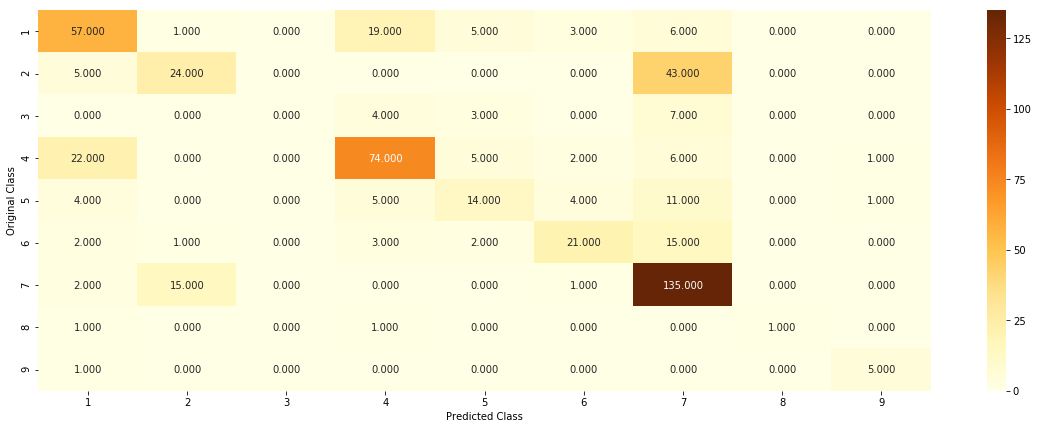

-------------------- Precision matrix (Columm Sum=1) --------------------


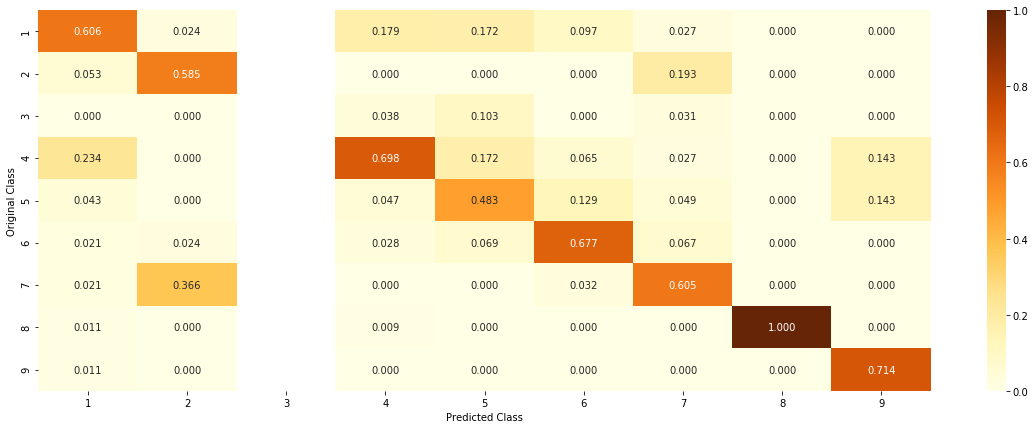

-------------------- Recall matrix (Row sum=1) --------------------


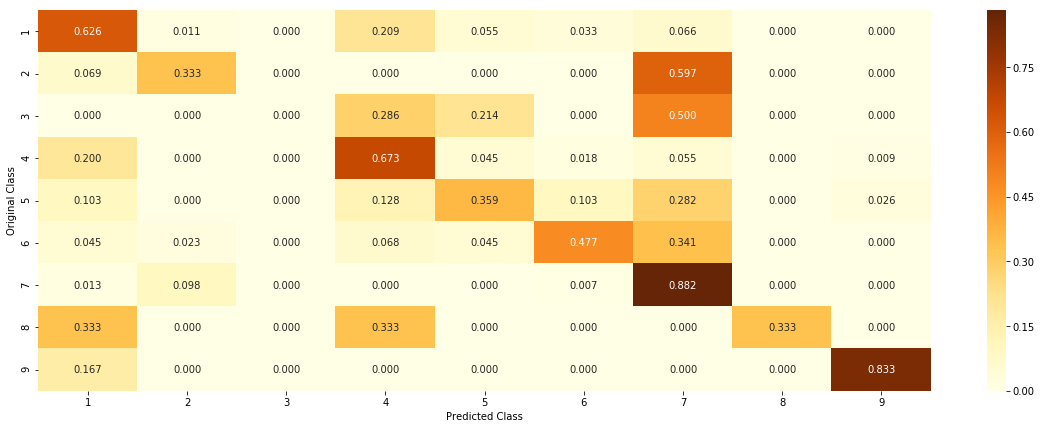

In [52]:
# to avoid rounding error while multiplying probabilites we use log-probability estimates
mis_cls = np.count_nonzero((sig_clf.predict(x_cv_tfidf_onehotencoding)- y_cv))*100 /len(y_cv)
print("% of missclassified point :", mis_cls)
results.update({'2' : {'Model' : 'Multinomial NB','Train Error':log_loss(y_train,predict_y_tr,eps=1e-15),
                                    'Test Error' : log_loss(y_test,predict_y_te,eps=1e-15),
                                    'Cv Error':log_loss(y_cv,predict_y_cv,eps=1e-15),
                                    'best_alpha':alpha[best_alpha],
                                    'Misclassification':mis_cls}})
plot_confusion_matrix(y_cv, sig_clf.predict(x_cv_tfidf_onehotencoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [53]:
### create a function that returns all the feature names 
def get_feature_names(indices,gene,variation,text,no_feat,vectorizer='tfidf'):
    gene_ = CountVectorizer().fit(x_train['Gene']).get_feature_names()
    variation_ = CountVectorizer().fit(x_train['Variation']).get_feature_names()
    if vectorizer == 'tfidf':
        text_ = TfidfVectorizer(max_features=1000).fit(x_train['TEXT']).get_feature_names()
    else:
        text_ = CountVectorizer(min_df=3,ngram_range=(1,2)).fit(x_train['TEXT']).get_feature_names()
                                
    feat1_len = len(gene_)
    feat2_len = len(variation_)
    word_present = 0
    for i,v in enumerate(indices):
        if v < feat1_len :
            ### select the feature name from gene which is at index v 
            word = gene_[v]
            ## confirm if the word is picked correctly by the index
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i,'Gene feature [{}] present in the test data point'.format(word) )
        elif v < (feat1_len + feat2_len) :
            ### select the feature name from variation which is at index v 
            word = variation_[v - feat1_len]
            ## confirm if the word is picked correctly by the index
            yes_no = True if word == variation else False
            if yes_no:
                word_present += 1
                print(i,'Variation feature [{}] present in the test data point'.format(word) )     
        else :
            ### select the feature name from text which is at index v 
            word = text_[v - (feat1_len + feat2_len)]
            ## confirm if the word is picked correctly by the index
            yes_no = True if word in text.split()  else False
            if yes_no:
                word_present += 1
                print(i,'Text feature [{}] present in the test data point'.format(word) ) 
    print('Out of top ',no_feat,' total of ',word_present, ' words from the text were present in the test datapoint')              

In [54]:
## consider the correctly classified point from the test
test_point_index = 100
## top fetures
top_num_features = 2000 
## print the predicted class of the test point
predicted_cls =  sig_clf.predict(x_te_tfidf_onehotencoding[test_point_index])
print('For the test data point ',test_point_index,' the predicted class is ',predicted_cls[0])
## print the actual class of the  test point
print('For the test data point ',test_point_index,' the actual class is ',y_test.iloc[test_point_index])
print('The probabilty values for test point ',test_point_index,' ',
      sig_clf.predict_proba(x_te_tfidf_onehotencoding[test_point_index]))
print('Top 2000 important features : ')
# sort the indices of the columns in the order of descending order 
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:2000]
get_feature_names(indices[0],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index],
                  x_test['TEXT'].iloc[test_point_index],top_num_features)

For the test data point  100  the predicted class is  7
For the test data point  100  the actual class is  7
The probabilty values for test point  100   [[ 0.07172584  0.16385543  0.01468607  0.0805863   0.03662909  0.05276643
   0.57089959  0.00497653  0.00387472]]
Top 2000 important features : 
1508 Text feature [odds] present in the test data point
1511 Text feature [brca] present in the test data point
1517 Text feature [ligase] present in the test data point
1521 Text feature [ring] present in the test data point
1526 Text feature [p16ink4a] present in the test data point
1528 Text feature [repair] present in the test data point
Out of top  2000  total of  6  words from the text were present in the test datapoint


In [55]:
## consider the incorrectly classified points from the dataset
## consider the correctly classified point from the test
test_point_index = 101
## top fetures
top_num_features = 2000 
## print the predicted class of the test point
predicted_cls =  sig_clf.predict(x_te_tfidf_onehotencoding[test_point_index])
print('For the test data point of incorrectly classified point',test_point_index,' the predicted class is '
      ,predicted_cls[0])
## print the actual class of the  test point
print('For the test data point of incorrectly classified point ',test_point_index,' the actual class is '
      ,y_test.iloc[test_point_index])
print('The probabilty values for test point '
      ,test_point_index,' ',sig_clf.predict_proba(x_te_tfidf_onehotencoding[test_point_index]))
print('Top 2000 important features : ')
# sort the indices of the columns in the order of descending order 
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:2000]
get_feature_names(indices[0],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index],
                  x_test['TEXT'].iloc[test_point_index],top_num_features)

For the test data point of incorrectly classified point 101  the predicted class is  4
For the test data point of incorrectly classified point  101  the actual class is  2
The probabilty values for test point  101   [[ 0.24497432  0.17439737  0.01679045  0.31938353  0.04219856  0.03961985
   0.15238324  0.00578132  0.00447136]]
Top 2000 important features : 
1690 Text feature [efficacy] present in the test data point
1694 Text feature [advanced] present in the test data point
1696 Text feature [fusions] present in the test data point
1697 Text feature [trials] present in the test data point
1704 Text feature [rearrangements] present in the test data point
1708 Text feature [met] present in the test data point
1709 Text feature [nras] present in the test data point
1710 Text feature [selective] present in the test data point
1711 Text feature [median] present in the test data point
1715 Text feature [constitutively] present in the test data point
1718 Text feature [metastatic] present i

<h3>4.1.2. K Nearest Neighbors </h3>

K Nearest Neighbors trained with alpha  5  with a log_loss of 1.1058045649
K Nearest Neighbors trained with alpha  11  with a log_loss of 1.11212072188
K Nearest Neighbors trained with alpha  15  with a log_loss of 1.10645764343
K Nearest Neighbors trained with alpha  21  with a log_loss of 1.10649322392
K Nearest Neighbors trained with alpha  31  with a log_loss of 1.10904147842
K Nearest Neighbors trained with alpha  41  with a log_loss of 1.10037763172
K Nearest Neighbors trained with alpha  51  with a log_loss of 1.10972585531
K Nearest Neighbors trained with alpha  99  with a log_loss of 1.14924825673


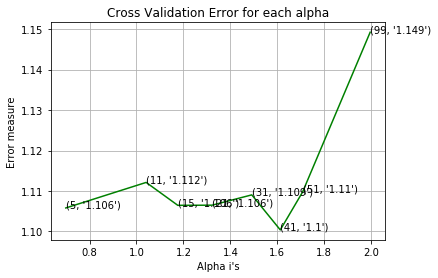

For values of best alpha =  41 The train log loss is: 0.831205287302
For values of best alpha =  41 The test log loss is: 1.05096034013
For values of best alpha =  41 The cross validation log loss is: 1.10037763172


In [56]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error = []
for i in alpha :
    KNN = KNeighborsClassifier(n_neighbors=i)
    ## trained after tfidf vectorizing on text data
    KNN.fit(x_tr_tfidf_responsencoding,y_train)
    sig_clf = CalibratedClassifierCV(KNN,method='sigmoid')
    sig_clf.fit(x_tr_tfidf_responsencoding,y_train)
    predict_cv = sig_clf.predict_proba(x_cv_tfidf_responsencoding)
    print('K Nearest Neighbors trained with alpha ',i,' with a log_loss of',log_loss(y_cv,predict_cv,
                                                                 labels=sig_clf.classes_, eps=1e-15))
    cv_log_error.append(log_loss(y_cv,predict_cv,labels=sig_clf.classes_, eps=1e-15))
    
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error,c='g')
for i, txt in enumerate(np.round(cv_log_error,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


### train the alpha with best parameter
best_alpha = np.argmin(cv_log_error)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(x_tr_tfidf_responsencoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_tr_tfidf_responsencoding, y_train)

predict_y_tr = sig_clf.predict_proba(x_tr_tfidf_responsencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_te = sig_clf.predict_proba(x_te_bow_responsencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The test log loss is:",log_loss(y_test, predict_y_te, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(x_cv_bow_responsencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))

<h4>4.1.2.1. Plot the confusion matrix after training with best alpha</h4>

Number of missclassified point : 37.96992481203007
-------------------- Confusion matrix --------------------


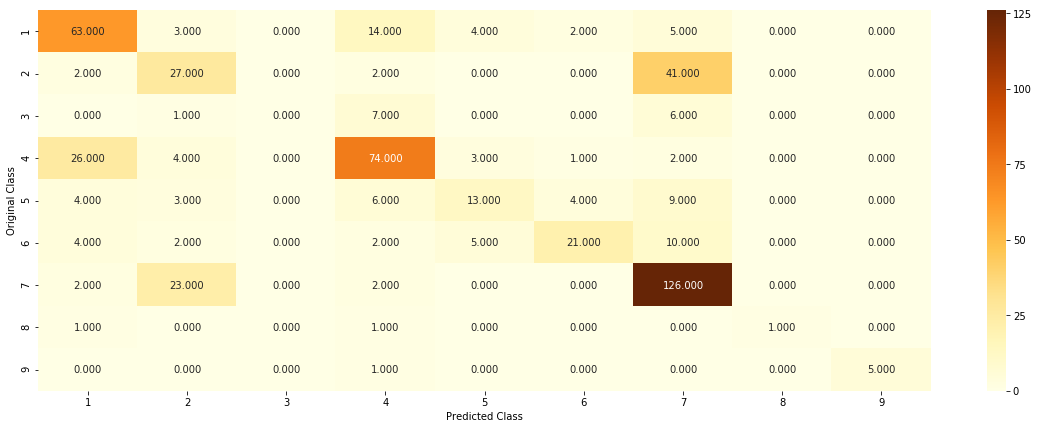

-------------------- Precision matrix (Columm Sum=1) --------------------


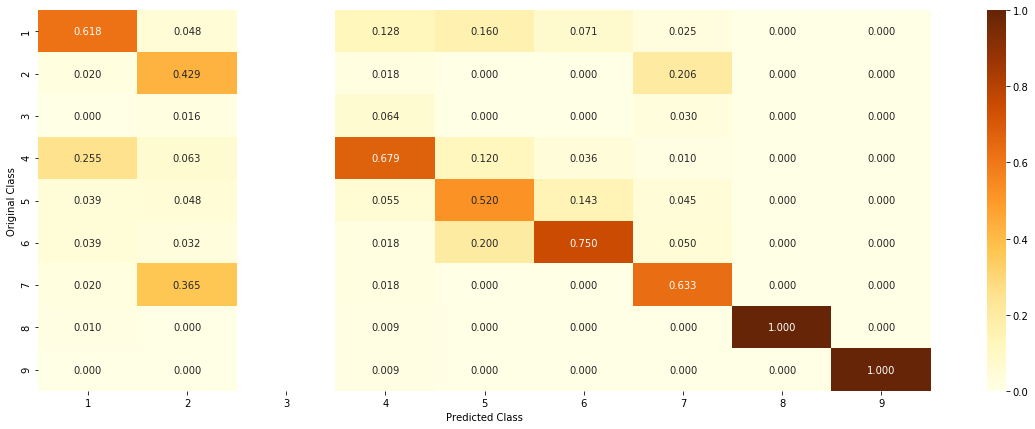

-------------------- Recall matrix (Row sum=1) --------------------


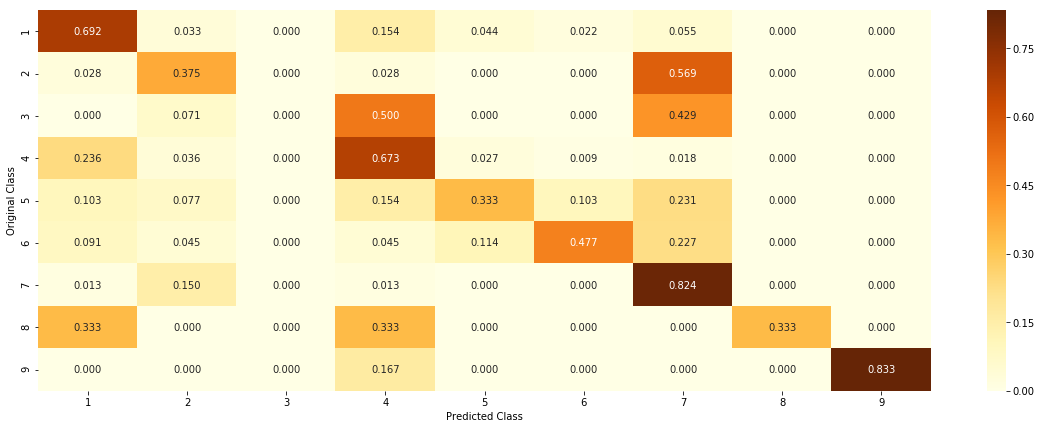

In [57]:
# to avoid rounding error while multiplying probabilites we use log-probability estimates
mis_cls = np.count_nonzero((sig_clf.predict(x_cv_tfidf_responsencoding)- y_cv))*100 /len(y_cv)
print("Number of missclassified point :", mis_cls)
plot_confusion_matrix(y_cv, sig_clf.predict(x_cv_tfidf_responsencoding.toarray()))
results.update({'3' : {'Model' : 'KNN','Train Error':log_loss(y_train,predict_y_tr,eps=1e-15),
                                    'Test Error' : log_loss(y_test,predict_y_te,eps=1e-15),
                                      'best_alpha':alpha[best_alpha],  
                                    'Cv Error':log_loss(y_cv,predict_y_cv,eps=1e-15),
                                    'Misclassification':mis_cls}})

<h3>4.2.3.Sample Query point -1</h3>

In [58]:
### for a given test point find its nearest neighbors
index_point =  2

### predict nearest neighbors for the test point
predicted_cls =  sig_clf.predict(x_te_tfidf_responsencoding[index_point])
kneighbors_idx = clf.kneighbors(x_te_tfidf_responsencoding[index_point],alpha[best_alpha])
print('Using K nearest neighbors for the datapoint ',index_point,' the predicted class ',predicted_cls[0])
print('Using K nearest neighbors for the datapoint ',index_point,' the actual class ',y_test.iloc[index_point])
print('The class of each of the nearest neighbors',list(y_train.iloc[kneighbors_idx[1][0]]))
print('Frequency of the nearest neighbors ',Counter(y_train.iloc[kneighbors_idx[1][0]]))

Using K nearest neighbors for the datapoint  2  the predicted class  7
Using K nearest neighbors for the datapoint  2  the actual class  2
The class of each of the nearest neighbors [6, 6, 7, 7, 2, 7, 7, 7, 7, 7, 7, 6, 2, 7, 7, 7, 7, 6, 2, 7, 7, 7, 7, 7, 7, 2, 7, 7, 2, 7, 7, 6, 2, 2, 7, 7, 2, 6, 2, 2, 7]
Frequency of the nearest neighbors  Counter({7: 25, 2: 10, 6: 6})


<h3>4.2.4.Sample Query point -2</h3>

In [59]:
### for a given test point find its nearest neighbors
index_point =  3

### predict nearest neighbors for the test point
predicted_cls =  sig_clf.predict(x_te_tfidf_responsencoding[index_point])
kneighbors_idx = clf.kneighbors(x_te_tfidf_responsencoding[index_point],alpha[best_alpha])
print('Using K nearest neighbors for the datapoint ',index_point,' the predicted class ',predicted_cls[0])
print('Using K nearest neighbors for the datapoint ',index_point,' the actual class ',y_test.iloc[index_point])
print('The class of each of the nearest neighbors',list(y_train.iloc[kneighbors_idx[1][0]]))
print('Frequency of the nearest neighbors ',Counter(y_train.iloc[kneighbors_idx[1][0]]))

Using K nearest neighbors for the datapoint  3  the predicted class  7
Using K nearest neighbors for the datapoint  3  the actual class  5
The class of each of the nearest neighbors [7, 7, 7, 2, 2, 7, 7, 7, 7, 7, 2, 7, 2, 5, 5, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 2, 2, 7, 7, 7, 2, 7, 7]
Frequency of the nearest neighbors  Counter({7: 30, 2: 8, 5: 2, 6: 1})


<h2>4.3. Logistic Regression using Bag of words vectorizations</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

Logistic Regression trained with alpha  1e-06  with a log_loss of 1.83088942735
Logistic Regression trained with alpha  1e-05  with a log_loss of 1.83088942735
Logistic Regression trained with alpha  0.0001  with a log_loss of 1.79794129613
Logistic Regression trained with alpha  0.001  with a log_loss of 1.29996961388
Logistic Regression trained with alpha  0.01  with a log_loss of 1.2512890875
Logistic Regression trained with alpha  0.1  with a log_loss of 1.22944793101
Logistic Regression trained with alpha  1  with a log_loss of 1.14319860654
Logistic Regression trained with alpha  10  with a log_loss of 1.12280532551
Logistic Regression trained with alpha  100  with a log_loss of 1.28538145236


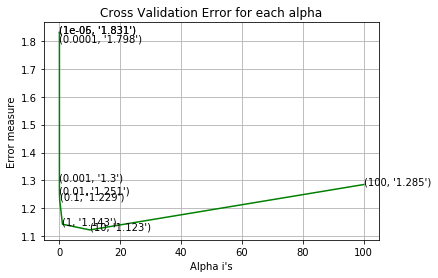

For values of best alpha =  10 The train log loss is: 0.839502046904
For values of best alpha =  10 The test log loss is: 1.15444403776
For values of best alpha =  10 The cross validation log loss is: 1.12280532551


In [60]:
alpha = [10 ** i for i in range(-6,3)]
cv_log_error = []
for i in alpha :
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l2', loss='log', random_state=42)
    ## trained after tfidf vectorizing on text data
    clf.fit(x_tr_bow_onehotencoding,y_train)
    sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(x_tr_bow_onehotencoding,y_train)
    predict_cv = sig_clf.predict_proba(x_cv_bow_onehotencoding)
    print('Logistic Regression trained with alpha ',i,' with a log_loss of',log_loss(y_cv,predict_cv,
                                                                 labels=sig_clf.classes_, eps=1e-15))
    cv_log_error.append(log_loss(y_cv,predict_cv,labels=sig_clf.classes_, eps=1e-15))
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error,c='g')
for i, txt in enumerate(np.round(cv_log_error,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


### train the alpha with best parameter
best_alpha = np.argmin(cv_log_error)
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_tr_bow_onehotencoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_tr_bow_onehotencoding, y_train)

predict_y_tr = sig_clf.predict_proba(x_tr_bow_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_te = sig_clf.predict_proba(x_te_bow_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The test log loss is:",log_loss(y_test, predict_y_te, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(x_cv_bow_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))


<h4>4.3.1.2 Plot the confusion matrix after training with best alpha</h4>

% of missclassified point : 38.909774436090224
-------------------- Confusion matrix --------------------


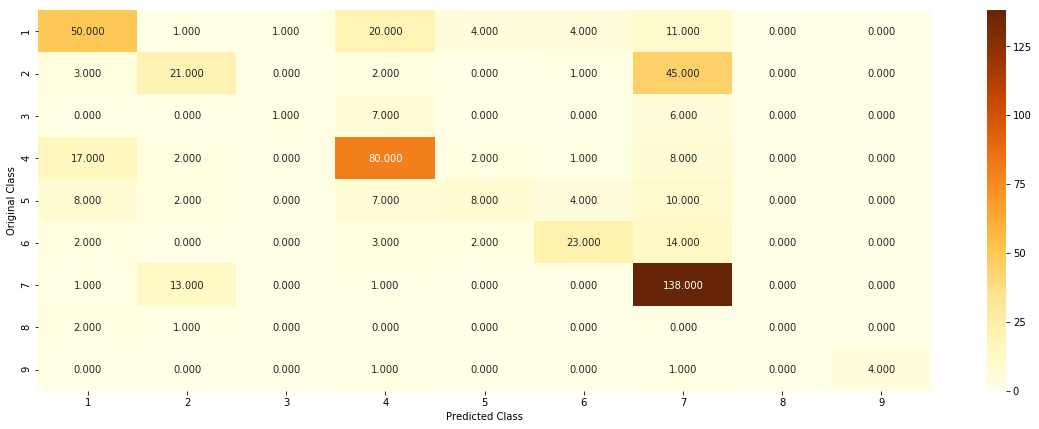

-------------------- Precision matrix (Columm Sum=1) --------------------


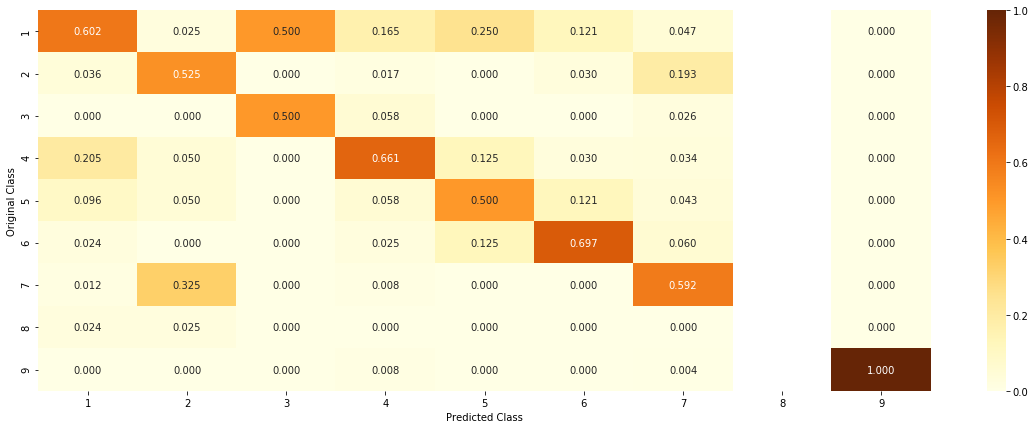

-------------------- Recall matrix (Row sum=1) --------------------


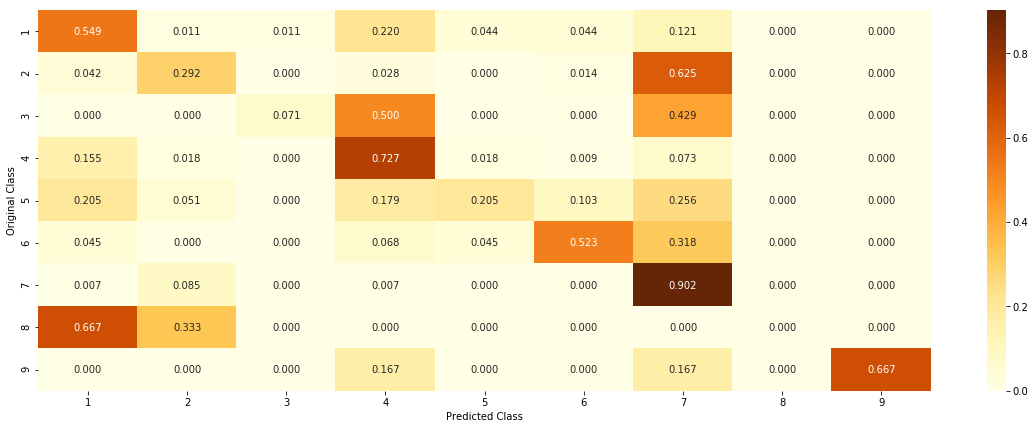

In [61]:
# to avoid rounding error while multiplying probabilites we use log-probability estimates
mis_cls = np.count_nonzero((sig_clf.predict(x_cv_bow_onehotencoding)- y_cv))*100 /len(y_cv)
print("% of missclassified point :", mis_cls)
plot_confusion_matrix(y_cv, sig_clf.predict(x_cv_bow_onehotencoding.toarray()))
results.update({'4' : {'Model' : 'Logistic Regresssion with balancing','Train Error':log_loss(y_train,predict_y_tr,eps=1e-15),
                                    'Test Error' : log_loss(y_test,predict_y_te,eps=1e-15),
                                    'best_alpha':alpha[best_alpha],
                                    'Cv Error':log_loss(y_cv,predict_y_cv,eps=1e-15),
                                    'Misclassification':mis_cls}})

<h4>4.3.1.3. Feature Importance, Correctly Classified point</h4>

In [62]:
test_point_index = np.zeros_like(sig_clf.predict(x_te_bow_onehotencoding) - y_test)[0]
no_feature = 500
predicted_cls = sig_clf.predict(x_te_bow_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_bow_onehotencoding[test_point_index]),4))
print("Actual Class :", y_test.iloc[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_feature_names(indices[0],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index],
                      x_test['TEXT'].iloc[test_point_index],no_feature,'bagofwords')

Predicted Class : 7
Predicted Class Probabilities: [[  9.50000000e-03   7.44000000e-02   2.90000000e-03   1.90000000e-03
    1.75000000e-02   3.90000000e-03   8.81100000e-01   8.70000000e-03
    2.00000000e-04]]
Actual Class : 7
--------------------------------------------------
1 Text feature [protein] present in the test data point
2 Text feature [variants] present in the test data point
4 Text feature [missense] present in the test data point
5 Text feature [loss] present in the test data point
6 Text feature [pten] present in the test data point
8 Text feature [function] present in the test data point
9 Text feature [fgfr1] present in the test data point
11 Text feature [activation] present in the test data point
12 Text feature [mutations] present in the test data point
15 Text feature [type] present in the test data point
19 Text feature [dna] present in the test data point
21 Text feature [flt3] present in the test data point
22 Text feature [vhl] present in the test data point


270 Text feature [id] present in the test data point
272 Text feature [transformation] present in the test data point
278 Text feature [dovitinib] present in the test data point
279 Text feature [acquired] present in the test data point
282 Text feature [adenocarcinoma] present in the test data point
285 Text feature [controls] present in the test data point
296 Text feature [receptor] present in the test data point
300 Text feature [shown] present in the test data point
305 Text feature [stage] present in the test data point
310 Text feature [prostate] present in the test data point
311 Text feature [oncogenes] present in the test data point
315 Text feature [several] present in the test data point
316 Text feature [ability] present in the test data point
318 Text feature [coding] present in the test data point
322 Text feature [target] present in the test data point
323 Text feature [si] present in the test data point
324 Text feature [genes] present in the test data point
325 Text f

#### 4.3.1.4. Feature Importance, Incorrectly Classified point

In [63]:
test_point_index =  np.nonzero(sig_clf.predict(x_te_bow_onehotencoding) - y_test)[0][0]
no_feature = 100
predicted_cls = sig_clf.predict(x_te_bow_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_bow_onehotencoding[test_point_index]),4))
print("Actual Class :", y_test.iloc[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_feature_names(indices[0],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index],
                      x_test['TEXT'].iloc[test_point_index],no_feature,'bagofwords')

Predicted Class : 7
Predicted Class Probabilities: [[ 0.0949  0.2257  0.0193  0.1369  0.0584  0.0934  0.3509  0.006   0.0146]]
Actual Class : 2
--------------------------------------------------
1 Text feature [protein] present in the test data point
7 Text feature [ros1] present in the test data point
11 Text feature [activation] present in the test data point
12 Text feature [mutations] present in the test data point
19 Text feature [dna] present in the test data point
23 Text feature [activity] present in the test data point
24 Text feature [using] present in the test data point
25 Text feature [cancers] present in the test data point
29 Text feature [gene] present in the test data point
32 Text feature [oncogene] present in the test data point
34 Text feature [activated] present in the test data point
36 Text feature [results] present in the test data point
37 Text feature [alk] present in the test data point
39 Text feature [egfr] present in the test data point
42 Text feature [id

<h3>4.3.2. Without Class balancing</h3>

#### 4.3.2.1. Hyper paramter tuning

Logistic Regression trained with alpha  1e-06  with a log_loss of 1.83088942735
Logistic Regression trained with alpha  1e-05  with a log_loss of 1.83088942735
Logistic Regression trained with alpha  0.0001  with a log_loss of 1.83088942735
Logistic Regression trained with alpha  0.001  with a log_loss of 1.2391074631
Logistic Regression trained with alpha  0.01  with a log_loss of 1.24300387906
Logistic Regression trained with alpha  0.1  with a log_loss of 1.25233265466
Logistic Regression trained with alpha  1  with a log_loss of 1.14942422299
Logistic Regression trained with alpha  10  with a log_loss of 1.11912567047
Logistic Regression trained with alpha  100  with a log_loss of 1.26194381622


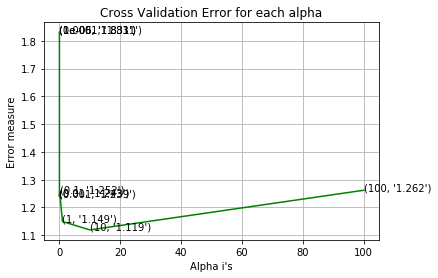

For values of best alpha =  10 The train log loss is: 0.828152016843
For values of best alpha =  10 The test log loss is: 1.15807343343
For values of best alpha =  10 The cross validation log loss is: 1.11912567047


In [64]:
alpha = [10 ** i for i in range(-6,3)]
cv_log_error = []
for i in alpha :
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    ## trained after tfidf vectorizing on text data
    clf.fit(x_tr_bow_onehotencoding,y_train)
    sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(x_tr_bow_onehotencoding,y_train)
    predict_cv = sig_clf.predict_proba(x_cv_bow_onehotencoding)
    print('Logistic Regression trained with alpha ',i,' with a log_loss of',log_loss(y_cv,predict_cv,
                                                                 labels=sig_clf.classes_, eps=1e-15))
    cv_log_error.append(log_loss(y_cv,predict_cv,labels=sig_clf.classes_, eps=1e-15))
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error,c='g')
for i, txt in enumerate(np.round(cv_log_error,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


### train the alpha with best parameter
best_alpha = np.argmin(cv_log_error)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_tr_bow_onehotencoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_tr_bow_onehotencoding, y_train)

predict_y_tr = sig_clf.predict_proba(x_tr_bow_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_te = sig_clf.predict_proba(x_te_bow_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The test log loss is:",log_loss(y_test, predict_y_te, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(x_cv_bow_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))


#### 4.3.2.2 Plot the confusion matrix after training with best alpha

Number of missclassified point : 198
-------------------- Confusion matrix --------------------


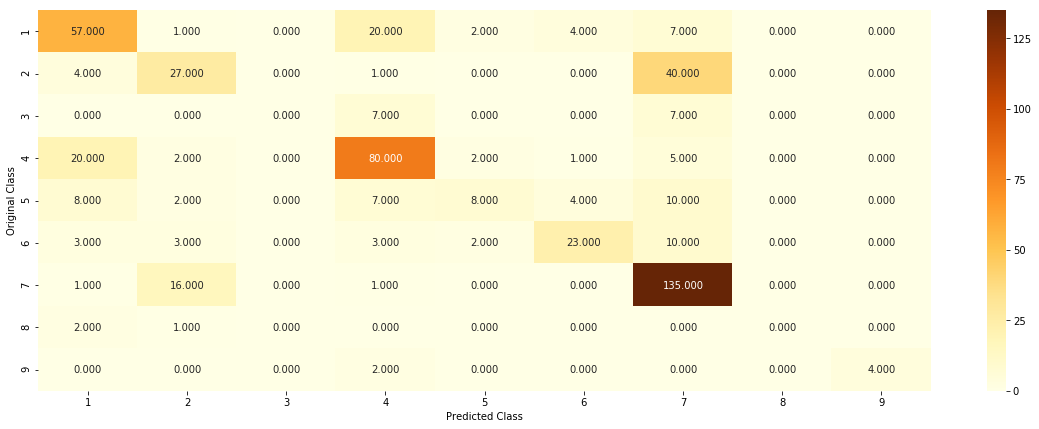

-------------------- Precision matrix (Columm Sum=1) --------------------


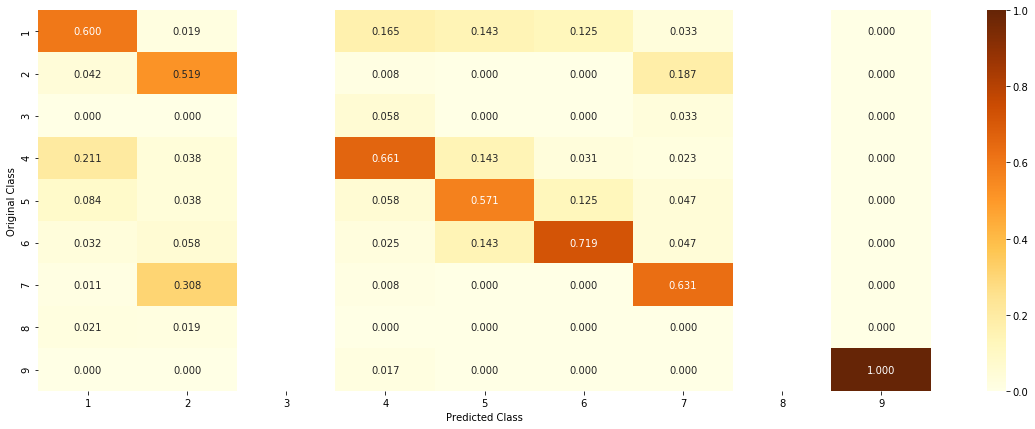

-------------------- Recall matrix (Row sum=1) --------------------


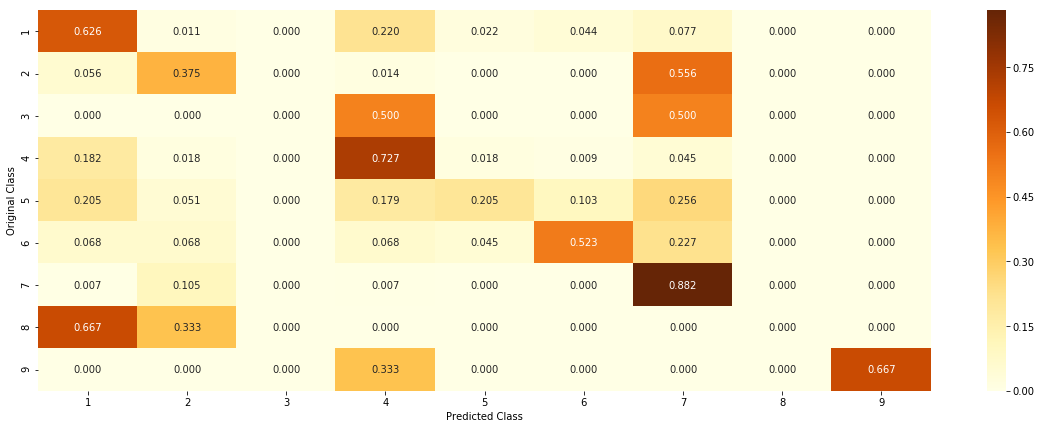

In [65]:
# to avoid rounding error while multiplying probabilites we use log-probability estimates
mis_cls = np.count_nonzero((sig_clf.predict(x_cv_bow_onehotencoding)- y_cv))*100 / len(y_cv)
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(x_cv_bow_onehotencoding)- y_cv)))
results.update({'5' : {'Model' : 'Logistic Regresssion without balancing',
                                   'Train Error':log_loss(y_train,predict_y_tr,eps=1e-15),
                                    'Test Error' : log_loss(y_test,predict_y_te,eps=1e-15),
                                    'Cv Error':log_loss(y_cv,predict_y_cv,eps=1e-15),
                                     'best_alpha':alpha[best_alpha],
                                    'Misclassification':mis_cls}})
plot_confusion_matrix(y_cv, sig_clf.predict(x_cv_bow_onehotencoding.toarray()))

#### <h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [66]:
test_point_index = np.zeros_like(sig_clf.predict(x_te_bow_onehotencoding) - y_test)[0]
no_feature = 500
predicted_cls = sig_clf.predict(x_te_bow_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_bow_onehotencoding[test_point_index]),4))
print("Actual Class :", y_test.iloc[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_feature_names(indices[0],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index],
                      x_test['TEXT'].iloc[test_point_index],no_feature,'bagofwords')

Predicted Class : 7
Predicted Class Probabilities: [[  6.70000000e-03   5.93000000e-02   2.70000000e-03   9.00000000e-04
    1.04000000e-02   2.60000000e-03   9.10900000e-01   6.00000000e-03
    4.00000000e-04]]
Actual Class : 7
--------------------------------------------------
2 Text feature [protein] present in the test data point
3 Text feature [missense] present in the test data point
4 Text feature [variants] present in the test data point
6 Text feature [loss] present in the test data point
9 Text feature [fgfr1] present in the test data point
10 Text feature [function] present in the test data point
13 Text feature [pten] present in the test data point
17 Text feature [activation] present in the test data point
18 Text feature [type] present in the test data point
20 Text feature [flt3] present in the test data point
21 Text feature [gene] present in the test data point
22 Text feature [vhl] present in the test data point
23 Text feature [studies] present in the test data point

300 Text feature [pathway] present in the test data point
301 Text feature [obtained] present in the test data point
303 Text feature [dovitinib] present in the test data point
306 Text feature [pathogenic] present in the test data point
308 Text feature [several] present in the test data point
310 Text feature [acquired] present in the test data point
311 Text feature [jak2] present in the test data point
315 Text feature [low] present in the test data point
316 Text feature [cases] present in the test data point
320 Text feature [able] present in the test data point
321 Text feature [mutational] present in the test data point
322 Text feature [2004] present in the test data point
326 Text feature [wt] present in the test data point
328 Text feature [phosphorylated] present in the test data point
330 Text feature [30] present in the test data point
334 Text feature [ca] present in the test data point
346 Text feature [domains] present in the test data point
347 Text feature [approxima

#### 4.3.2.4. Feature Importance, Incorrectly Classified point

In [67]:
test_point_index =  np.nonzero(sig_clf.predict(x_te_bow_onehotencoding) - y_test)[0][0]
no_feature = 500
predicted_cls = sig_clf.predict(x_te_bow_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_bow_onehotencoding[test_point_index]),4))
print("Actual Class :", y_test.iloc[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_feature_names(indices[0],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index],
                      x_test['TEXT'].iloc[test_point_index],no_feature,'bagofwords')

Predicted Class : 7
Predicted Class Probabilities: [[ 0.0936  0.2359  0.0304  0.12    0.072   0.1053  0.3133  0.007   0.0226]]
Actual Class : 2
--------------------------------------------------
2 Text feature [protein] present in the test data point
7 Text feature [ros1] present in the test data point
17 Text feature [activation] present in the test data point
21 Text feature [gene] present in the test data point
25 Text feature [oncogene] present in the test data point
27 Text feature [overexpression] present in the test data point
28 Text feature [cancers] present in the test data point
30 Text feature [activity] present in the test data point
31 Text feature [mutant] present in the test data point
32 Text feature [activating] present in the test data point
33 Text feature [dna] present in the test data point
34 Text feature [activated] present in the test data point
36 Text feature [results] present in the test data point
44 Text feature [using] present in the test data point
45 Te

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

Linear SVM trained with C  1e-06  with a log_loss of 1.1046351133
Linear SVM trained with C  1e-05  with a log_loss of 1.08053136882
Linear SVM trained with C  0.0001  with a log_loss of 1.05444981274
Linear SVM trained with C  0.001  with a log_loss of 1.11915426157
Linear SVM trained with C  0.01  with a log_loss of 1.31801357391
Linear SVM trained with C  0.1  with a log_loss of 1.50588351515
Linear SVM trained with C  1  with a log_loss of 1.58959749923
Linear SVM trained with C  10  with a log_loss of 1.58959749372
Linear SVM trained with C  100  with a log_loss of 1.58959749325


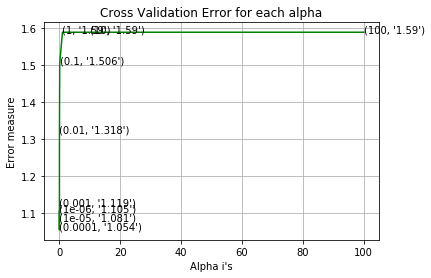

For values of best alpha =  0.0001 The train log loss is: 0.322931097501
For values of best alpha =  0.0001 The test log loss is: 1.02790901388
For values of best alpha =  0.0001 The cross validation log loss is: 1.05444981274


In [68]:
alpha = [10 ** i for i in range(-6,3)]
cv_log_error = []
for i in alpha :
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l2', loss='hinge', random_state=42)
    ## trained after tfidf vectorizing on text data
    clf.fit(x_tr_tfidf_onehotencoding,y_train)
    sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(x_tr_tfidf_onehotencoding,y_train)
    predict_cv = sig_clf.predict_proba(x_cv_tfidf_onehotencoding)
    print('Linear SVM trained with C ',i,' with a log_loss of',log_loss(y_cv,predict_cv,
                                                                 labels=sig_clf.classes_, eps=1e-15))
    cv_log_error.append(log_loss(y_cv,predict_cv,labels=sig_clf.classes_, eps=1e-15))
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error,c='g')
for i, txt in enumerate(np.round(cv_log_error,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


### train the alpha with best parameter
best_alpha = np.argmin(cv_log_error)
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(x_tr_tfidf_onehotencoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_tr_tfidf_onehotencoding, y_train)

predict_y_tr = sig_clf.predict_proba(x_tr_tfidf_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_te = sig_clf.predict_proba(x_te_tfidf_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The test log loss is:",log_loss(y_test, predict_y_te, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(x_cv_tfidf_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], 
      "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))


#### 4.4.2 Plot the confusion matrix after training with best alpha

Number of missclassified point : 36.8421052631579
-------------------- Confusion matrix --------------------


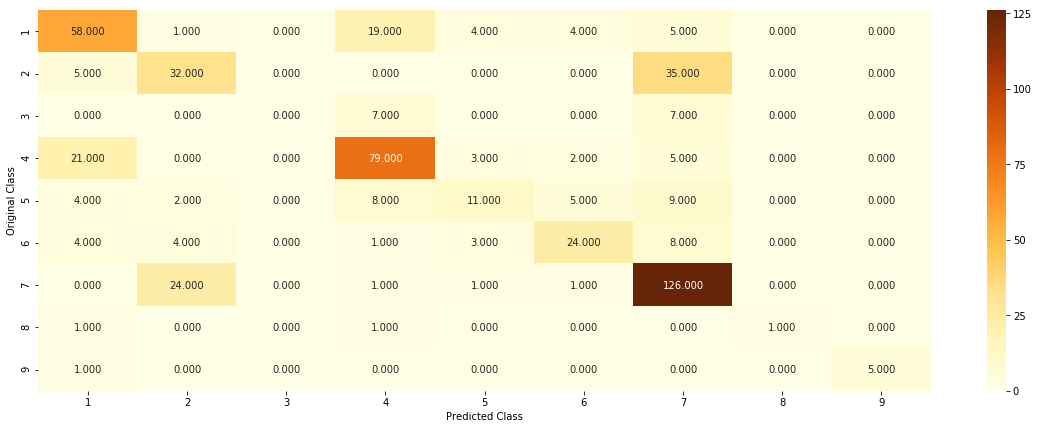

-------------------- Precision matrix (Columm Sum=1) --------------------


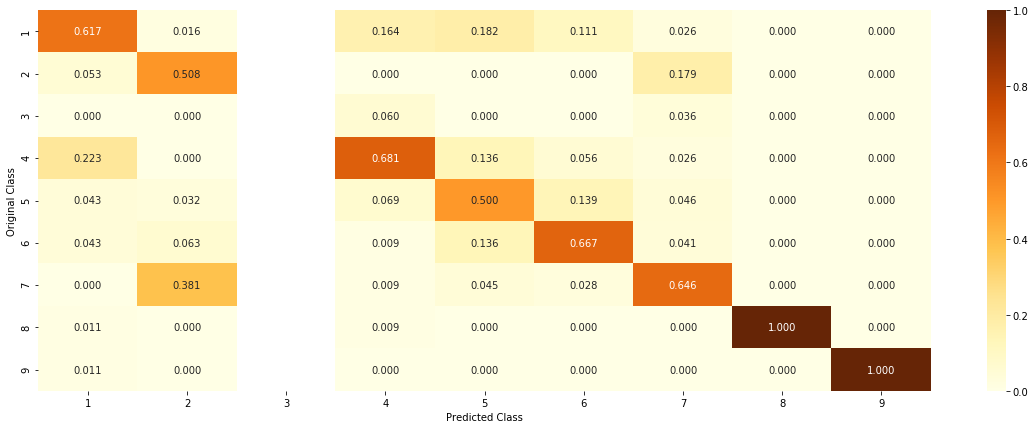

-------------------- Recall matrix (Row sum=1) --------------------


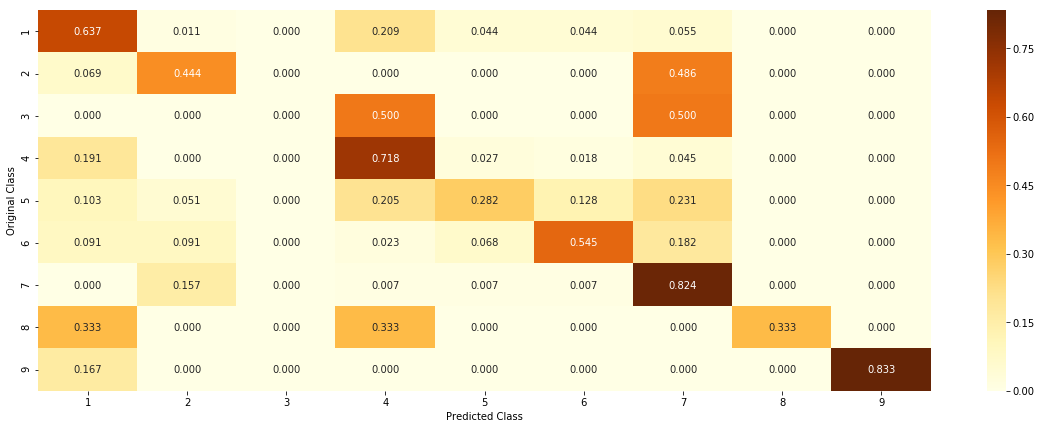

In [69]:
# to avoid rounding error while multiplying probabilites we use log-probability estimates
mis_cls = np.count_nonzero((sig_clf.predict(x_cv_tfidf_onehotencoding)- y_cv))*100 / len(y_cv)
print("Number of missclassified point :", mis_cls)
plot_confusion_matrix(y_cv, sig_clf.predict(x_cv_tfidf_onehotencoding.toarray()))
results.update({'6' : {'Model' : 'Linear SVM',
                       'Train Error':log_loss(y_train,predict_y_tr,eps=1e-15),
                        'Test Error' : log_loss(y_test,predict_y_te,eps=1e-15),
                        'best_alpha':alpha[best_alpha],
                        'Cv Error':log_loss(y_cv,predict_y_cv,eps=1e-15),
                        'Misclassification':mis_cls}})

#### <h4>4.4.3. Feature Importance, Correctly Classified point</h4>

In [70]:
test_point_index = np.zeros_like(sig_clf.predict(x_te_tfidf_onehotencoding) - y_test)[0]
no_feature = 100
predicted_cls = sig_clf.predict(x_te_tfidf_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_tfidf_onehotencoding[test_point_index]),4))
print("Actual Class :", y_test.iloc[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_feature_names(indices[0],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index],
                      x_test['TEXT'].iloc[test_point_index],no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[ 0.1304  0.1213  0.0102  0.0464  0.0653  0.0697  0.5485  0.0035  0.0047]]
Actual Class : 7
--------------------------------------------------
24 Text feature [codon] present in the test data point
25 Text feature [mutant] present in the test data point
76 Text feature [flt3] present in the test data point
Out of top  100  total of  3  words from the text were present in the test datapoint


#### 4.4.4. Feature Importance, Incorrectly Classified point

In [71]:
test_point_index = np.nonzero(sig_clf.predict(x_te_tfidf_onehotencoding) - y_test)[0][0]
no_feature = 500
predicted_cls = sig_clf.predict(x_te_tfidf_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_tfidf_onehotencoding[test_point_index]),4))
print("Actual Class :", y_test.iloc[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_feature_names(indices[0],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index],
                      x_test['TEXT'].iloc[test_point_index],no_feature,'bagofwords')

Predicted Class : 7
Predicted Class Probabilities: [[ 0.2389  0.1059  0.0238  0.0403  0.1267  0.0789  0.3704  0.0065  0.0086]]
Actual Class : 5
--------------------------------------------------
Out of top  500  total of  0  words from the text were present in the test datapoint


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [72]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error = []
ij =[]
for i in alpha :
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i,max_depth=j,criterion='gini',n_jobs=-1, random_state=42)
        ## trained after tfidf vectorizing on text data
        clf.fit(x_tr_tfidf_onehotencoding,y_train)
        sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
        sig_clf.fit(x_tr_tfidf_onehotencoding,y_train)
        predict_cv = sig_clf.predict_proba(x_cv_tfidf_onehotencoding)
        print('for number of estimators',i,' and max_depth ',j,' with a log_loss of',log_loss(y_cv,predict_cv,
                                                                     labels=sig_clf.classes_, eps=1e-15))
        cv_log_error.append(log_loss(y_cv,predict_cv,labels=sig_clf.classes_, eps=1e-15))
        ij.append((i,j))
    

best_alpha =np.argmin(cv_log_error)
### train the alpha with best parameter
clf = RandomForestClassifier(n_estimators=ij[best_alpha][0],max_depth=ij[best_alpha][1],
                             criterion='gini',n_jobs=-1, random_state=42)

## trained after tfidf vectorizing on text data
clf.fit(x_tr_tfidf_onehotencoding,y_train)
sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(x_tr_tfidf_onehotencoding,y_train)

predict_y_tr = sig_clf.predict_proba(x_tr_tfidf_onehotencoding)
print('For values of (n_estimators,max_depth) ', ij[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_te = sig_clf.predict_proba(x_te_tfidf_onehotencoding)
print('For values of (n_estimators,max_depth) ', ij[best_alpha], 
      "The test log loss is:",log_loss(y_test, predict_y_te, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(x_cv_tfidf_onehotencoding)
print('For values of (n_estimators,max_depth) ', ij[best_alpha], 
      "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))


for number of estimators 100  and max_depth  5  with a log_loss of 1.08622165446
for number of estimators 100  and max_depth  10  with a log_loss of 1.04091869703
for number of estimators 200  and max_depth  5  with a log_loss of 1.08207916078
for number of estimators 200  and max_depth  10  with a log_loss of 1.0345390391
for number of estimators 500  and max_depth  5  with a log_loss of 1.07453130241
for number of estimators 500  and max_depth  10  with a log_loss of 1.03112360091
for number of estimators 1000  and max_depth  5  with a log_loss of 1.07432296536
for number of estimators 1000  and max_depth  10  with a log_loss of 1.03151686309
for number of estimators 2000  and max_depth  5  with a log_loss of 1.07077995237
for number of estimators 2000  and max_depth  10  with a log_loss of 1.02951235294
For values of (n_estimators,max_depth)  (2000, 10) The train log loss is: 0.484851110951
For values of (n_estimators,max_depth)  (2000, 10) The test log loss is: 1.02378559085
For va

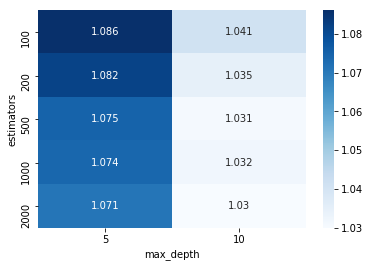

In [73]:
est,dep = [],[]
for i in range(len(cv_log_error)):
    est.append(alpha[int(i/2)])
    dep.append(max_depth[int(i%2)])
cv_log_error = np.round(cv_log_error,3)
df = pd.DataFrame(data ={'estimators':est,'max_depth':dep,'cv_error':cv_log_error})
df = df.pivot("estimators", "max_depth", "cv_error")
sns.heatmap(df,annot=True,fmt='g',cmap='Blues')

% of missclassified point : 33.83458646616541
-------------------- Confusion matrix --------------------


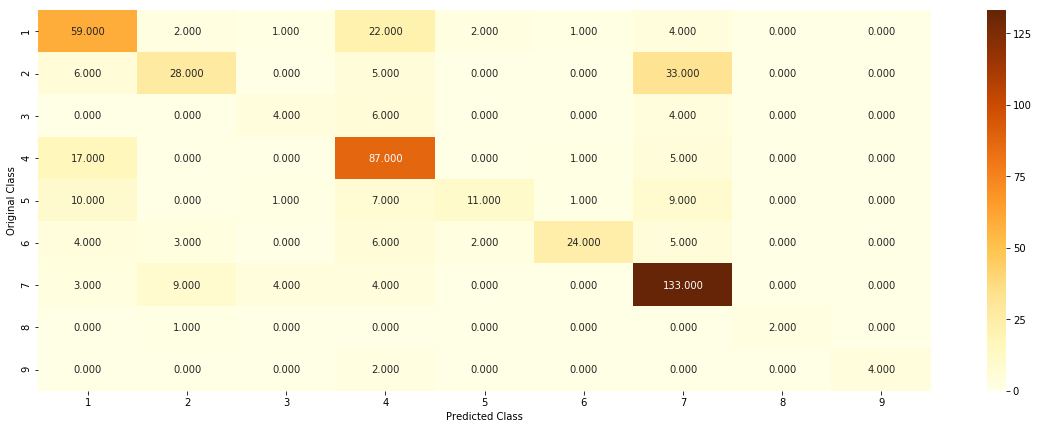

-------------------- Precision matrix (Columm Sum=1) --------------------


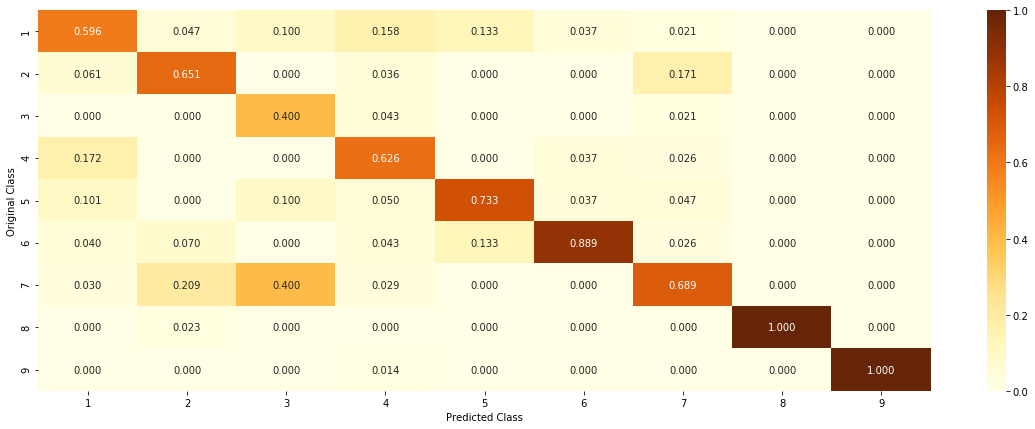

-------------------- Recall matrix (Row sum=1) --------------------


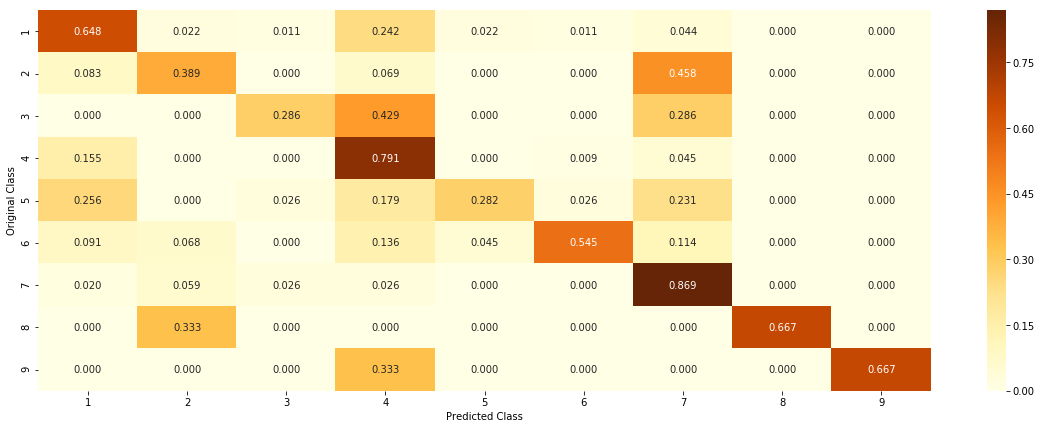

In [74]:
### % of misclassified points and confusion matrix
mis_cls = np.count_nonzero((sig_clf.predict(x_cv_tfidf_onehotencoding)- y_cv))*100 / len(y_cv)
print("% of missclassified point :", mis_cls)
plot_confusion_matrix(y_cv, sig_clf.predict(x_cv_tfidf_onehotencoding.toarray()))
results.update({'7' : {'Model' : 'RandomForest-onehotencoding',
                       'Train Error':log_loss(y_train,predict_y_tr,eps=1e-15),
                        'Test Error' : log_loss(y_test,predict_y_te,eps=1e-15),
                        'best_alpha':ij[best_alpha],
                        'Cv Error':log_loss(y_cv,predict_y_cv,eps=1e-15),
                        'Misclassification':mis_cls}})

<h3>4.5.2. Feature Importance</h3>

<h4>4.5.2.1. Correctly Classified point</h4>

In [75]:
test_point_index = np.zeros_like(sig_clf.predict(x_te_tfidf_onehotencoding) - y_test)[0]
no_feature = 100
predicted_cls = sig_clf.predict(x_te_tfidf_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_tfidf_onehotencoding[test_point_index]),4))
print("Actual Class :", y_test.iloc[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_feature_names(indices[:no_feature],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index],
                      x_test['TEXT'].iloc[test_point_index],no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[ 0.0359  0.0899  0.0146  0.0352  0.0297  0.0251  0.7582  0.0055  0.0059]]
Actual Class : 7
--------------------------------------------------
0 Text feature [kinase] present in the test data point
1 Text feature [activating] present in the test data point
2 Text feature [activation] present in the test data point
3 Text feature [suppressor] present in the test data point
4 Text feature [inhibitors] present in the test data point
5 Text feature [function] present in the test data point
6 Text feature [activated] present in the test data point
7 Text feature [tyrosine] present in the test data point
8 Text feature [loss] present in the test data point
9 Text feature [phosphorylation] present in the test data point
10 Text feature [inhibitor] present in the test data point
11 Text feature [treatment] present in the test data point
12 Text feature [missense] present in the test data point
13 Text feature [constitutive] present in the tes

<h4>4.5.2.2. Inorrectly Classified point</h4>

In [76]:
test_point_index = np.nonzero(sig_clf.predict(x_te_tfidf_onehotencoding) - y_test)[0][0]
no_feature = 100
predicted_cls = sig_clf.predict(x_te_tfidf_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_tfidf_onehotencoding[test_point_index]),4))
print("Actuall Class :", y_test.iloc[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_feature_names(indices[:no_feature], x_test['TEXT'].iloc[test_point_index],x_test['Gene'].iloc[test_point_index],x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[ 0.0449  0.2755  0.0173  0.0529  0.0333  0.0327  0.5312  0.0061  0.0061]]
Actuall Class : 2
--------------------------------------------------
Out of top  100  total of  0  words from the text were present in the test datapoint


<h3>4.5.3. Hyper paramter tuning (Response Encoding)</h3>

In [77]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error = []
ij =[]
for i in alpha :
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i,max_depth=j,criterion='gini',n_jobs=-1, random_state=42)
        ## trained after tfidf vectorizing on text data
        clf.fit(x_tr_tfidf_responsencoding,y_train)
        sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
        sig_clf.fit(x_tr_tfidf_responsencoding,y_train)
        predict_cv = sig_clf.predict_proba(x_cv_tfidf_responsencoding)
        print('for number of estimators',i,' and max_depth ',j,' with a log_loss of',log_loss(y_cv,predict_cv,
                                                                     labels=sig_clf.classes_, eps=1e-15))
        cv_log_error.append(log_loss(y_cv,predict_cv,labels=sig_clf.classes_, eps=1e-15))
        ij.append((i,j))
    

# ### train the alpha with best parameter
# fig, ax = plt.subplots()
# ## creating features such that we each point is dot product of estimators and max depth
# features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
# ax.plot(features, cv_log_error,c='g')
# for i, txt in enumerate(np.round(cv_log_error,3)):
#     ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error[i]))
# plt.grid()
# plt.title("Cross Validation Error for each alpha")
# plt.xlabel("Alpha i's")
# plt.ylabel("Error measure")
# plt.show()

## trained after tfidf vectorizing on text data
clf.fit(x_tr_tfidf_responsencoding,y_train)
sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(x_tr_tfidf_responsencoding,y_train)
predict_y_tr = sig_clf.predict_proba(x_tr_tfidf_responsencoding)

print('For values of (n_estimators,max_depth) ', ij[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_te = sig_clf.predict_proba(x_te_tfidf_responsencoding)
print('For values of (n_estimators,max_depth) ', ij[best_alpha], 
      "The test log loss is:",log_loss(y_test, predict_y_te, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(x_cv_tfidf_responsencoding)
print('For values of (n_estimators,max_depth) ', ij[best_alpha], 
      "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))


for number of estimators 100  and max_depth  5  with a log_loss of 1.34737344717
for number of estimators 100  and max_depth  10  with a log_loss of 1.6961716601
for number of estimators 200  and max_depth  5  with a log_loss of 1.3919557946
for number of estimators 200  and max_depth  10  with a log_loss of 1.73425199694
for number of estimators 500  and max_depth  5  with a log_loss of 1.44610320414
for number of estimators 500  and max_depth  10  with a log_loss of 1.75586959417
for number of estimators 1000  and max_depth  5  with a log_loss of 1.42494298938
for number of estimators 1000  and max_depth  10  with a log_loss of 1.72962712114
for number of estimators 2000  and max_depth  5  with a log_loss of 1.41676852346
for number of estimators 2000  and max_depth  10  with a log_loss of 1.75200382605
For values of (n_estimators,max_depth)  (2000, 10) The train log loss is: 0.0360309108048
For values of (n_estimators,max_depth)  (2000, 10) The test log loss is: 1.76860234214
For va

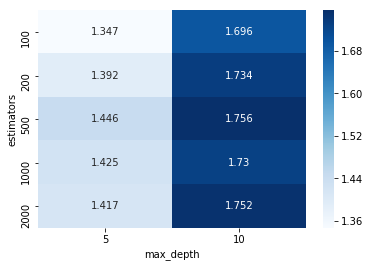

In [78]:
##https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
est,dep = [],[]
for i in range(len(cv_log_error)):
    est.append(alpha[int(i/2)])
    dep.append(max_depth[int(i%2)])
cv_log_error = np.round(cv_log_error,3)
df = pd.DataFrame(data ={'estimators':est,'max_depth':dep,'cv_error':cv_log_error})
df = df.pivot("estimators", "max_depth", "cv_error")
sns.heatmap(df,annot=True,fmt='g',cmap='Blues')

% of missclassified point : 67.10526315789474
-------------------- Confusion matrix --------------------


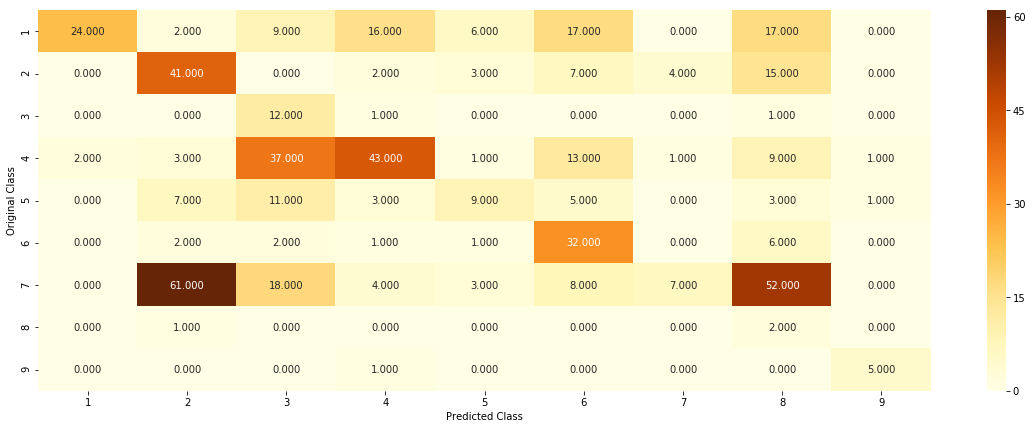

-------------------- Precision matrix (Columm Sum=1) --------------------


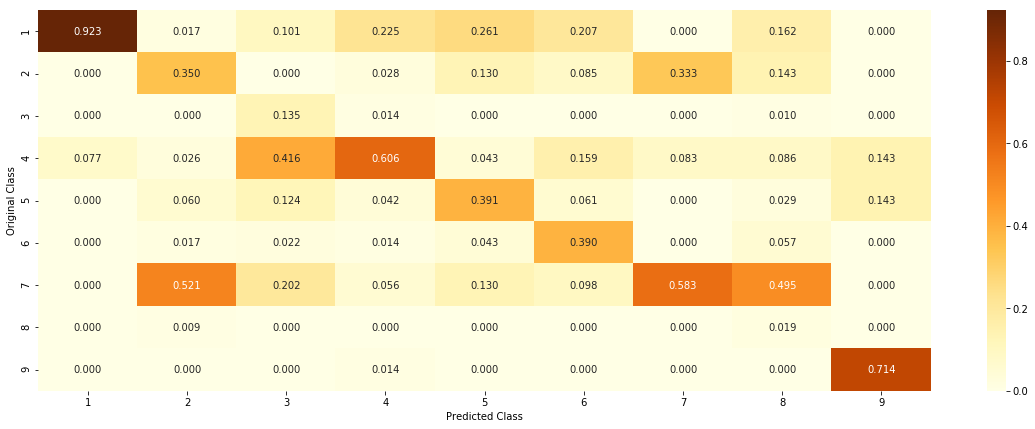

-------------------- Recall matrix (Row sum=1) --------------------


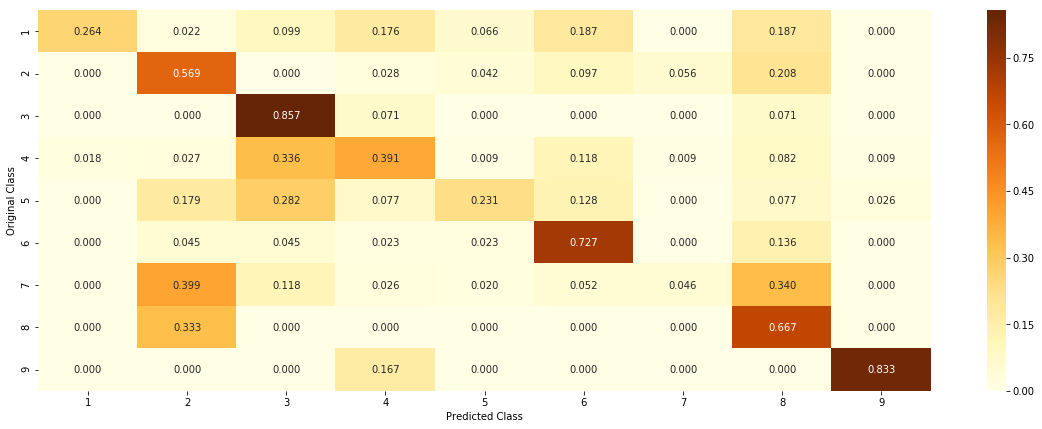

In [79]:
### % of misclassified points and confusion matrix
mis_cls = np.count_nonzero((sig_clf.predict(x_cv_tfidf_responsencoding)- y_cv))*100 / len(y_cv)
print("% of missclassified point :", mis_cls)
plot_confusion_matrix(y_cv,sig_clf.predict(x_cv_tfidf_responsencoding))
results.update({'8' : {'Model' : 'RandomForest-responsencoding',
                       'Train Error':log_loss(y_train,predict_y_tr,eps=1e-15),
                        'Test Error' : log_loss(y_test,predict_y_te,eps=1e-15),
                        'bestalpha' : ij[best_alpha]  , 
                        'Cv Error':log_loss(y_cv,predict_y_cv,eps=1e-15),
                        'Misclassification':mis_cls}})

<h3>4.5.3 Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [80]:
test_point_index = np.zeros_like(sig_clf.predict(x_te_tfidf_responsencoding) - y_test)[0]
predicted_cls = sig_clf.predict(x_te_tfidf_responsencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_tfidf_responsencoding[test_point_index]),4))
print("Actual Class :", y_test.iloc[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[ 0.0776  0.2249  0.0526  0.0891  0.1231  0.1632  0.1074  0.1329  0.0292]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.3.2. Inorrectly Classified point</h4>

In [81]:
test_point_index = np.nonzero(sig_clf.predict(x_te_tfidf_responsencoding) - y_test)[0][0]
no_feature = 100
predicted_cls = sig_clf.predict(x_te_tfidf_responsencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(x_te_tfidf_responsencoding[test_point_index]),4))
print("Actuall Class :", y_test.iloc[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[ 0.0776  0.2249  0.0526  0.0891  0.1231  0.1632  0.1074  0.1329  0.0292]]
Actuall Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [82]:
clf1 = SGDClassifier(alpha=results['4']['best_alpha'], penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(x_tr_bow_onehotencoding, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")
sig_clf1.fit(x_tr_bow_onehotencoding,y_train)

clf2 = SGDClassifier(alpha=results['6']['best_alpha'], penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(x_tr_tfidf_onehotencoding, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")
sig_clf2.fit(x_tr_tfidf_onehotencoding,y_train)

clf3 = MultinomialNB(alpha=results['2']['best_alpha'])
clf3.fit(x_tr_tfidf_onehotencoding, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")
sig_clf3.fit(x_tr_tfidf_onehotencoding,y_train)

print('Logistic Regression: Log-Loss: ',log_loss(y_cv,sig_clf1.predict_proba(x_cv_bow_onehotencoding)))
print('Support vector machines : Log-Loss: ',log_loss(y_cv,sig_clf2.predict_proba(x_cv_tfidf_onehotencoding)))
print('Multinomial Naive Byes: Log-Loss: ',log_loss(y_cv,sig_clf3.predict_proba(x_cv_tfidf_onehotencoding)))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr =  LogisticRegression(C=i)
    stack_clf=StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    stack_clf.fit(x_tr_tfidf_onehotencoding,y_train)
    print('Stacking Classifiers: for alpha value: ',i,' Log-Loss: ',log_loss(y_cv,
                                                  stack_clf.predict_proba(x_cv_tfidf_onehotencoding)))

Logistic Regression: Log-Loss:  1.12769194255
Support vector machines : Log-Loss:  1.05351280063
Multinomial Naive Byes: Log-Loss:  1.20987537078
--------------------------------------------------
Stacking Classifiers: for alpha value:  0.0001  Log-Loss:  1.81650481229
Stacking Classifiers: for alpha value:  0.001  Log-Loss:  1.70996151851
Stacking Classifiers: for alpha value:  0.01  Log-Loss:  1.32730450114
Stacking Classifiers: for alpha value:  0.1  Log-Loss:  1.19372121154
Stacking Classifiers: for alpha value:  1  Log-Loss:  1.39367636646
Stacking Classifiers: for alpha value:  10  Log-Loss:  1.73275361395


### Testing the model with the best hyperparameter



Log loss (train) on the stacking classifier : 0.231428574033
Log loss (CV) on the stacking classifier : 1.19372121154
Log loss (test) on the stacking classifier : 1.10467352819
Number of missclassified point : 36.090225563909776
-------------------- Confusion matrix --------------------


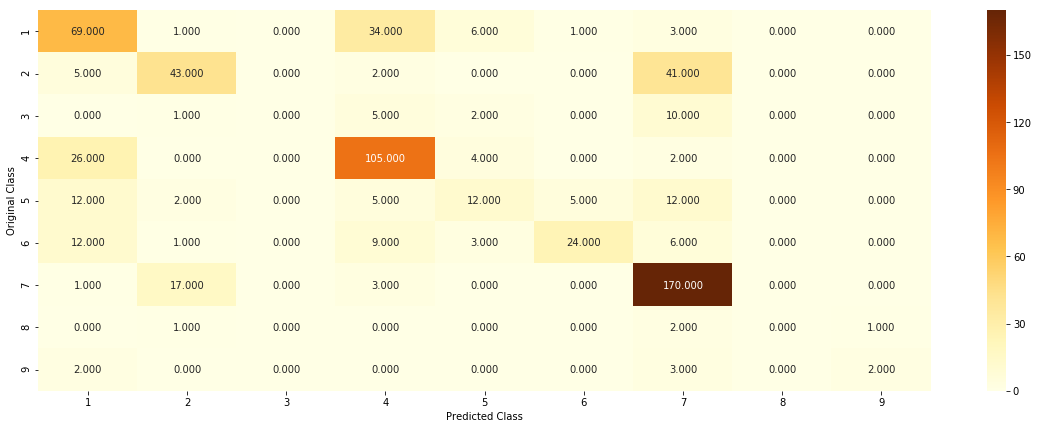

-------------------- Precision matrix (Columm Sum=1) --------------------


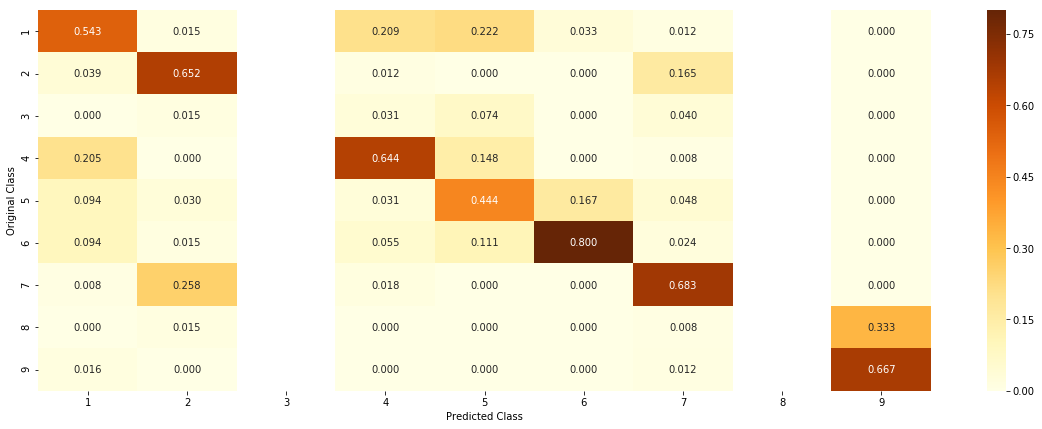

-------------------- Recall matrix (Row sum=1) --------------------


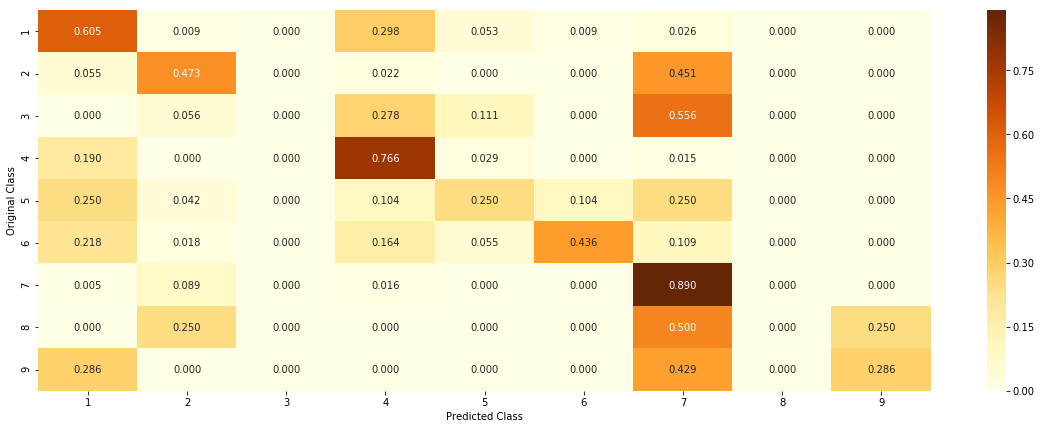

In [83]:
## best hyper parameter is  0.1
lr =  LogisticRegression(C=0.1)
stack_clf=StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
stack_clf.fit(x_tr_tfidf_onehotencoding,y_train)

log_error_tr = log_loss(y_train, stack_clf.predict_proba(x_tr_tfidf_onehotencoding))
print("Log loss (train) on the stacking classifier :",log_error_tr)

log_error_cv = log_loss(y_cv, stack_clf.predict_proba(x_cv_tfidf_onehotencoding))
print("Log loss (CV) on the stacking classifier :",log_error_cv)

log_error_te = log_loss(y_test, stack_clf.predict_proba(x_te_tfidf_onehotencoding))
print("Log loss (test) on the stacking classifier :",log_error_te)
x_te_tfidf_onehotencoding
print("Number of missclassified point :", np.count_nonzero((stack_clf.predict(x_te_tfidf_onehotencoding)- y_test))*100 /y_test.shape[0])
plot_confusion_matrix(y_test,stack_clf.predict(x_te_tfidf_onehotencoding))

In [84]:
results.update({'9' : {'Model' : 'stacking models',
                       'Train Error':log_error_tr,
                        'Test Error' : log_error_te,
                        'bestalpha' : 0.1  , 
                        'Cv Error':log_error_cv,
                        'Misclassification':np.count_nonzero((stack_clf.predict(x_te_tfidf_onehotencoding)- y_test))*100 /y_test.shape[0]}})

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.6600011771
Log loss (CV) on the VotingClassifier : 1.1880524984
Log loss (test) on the VotingClassifier : 1.17127488201
Number of missclassified point : 35.93984962406015
-------------------- Confusion matrix --------------------


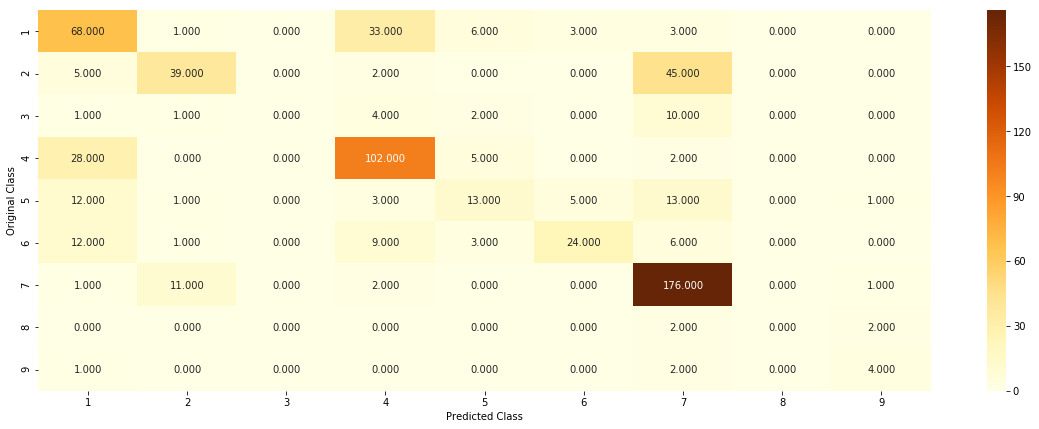

-------------------- Precision matrix (Columm Sum=1) --------------------


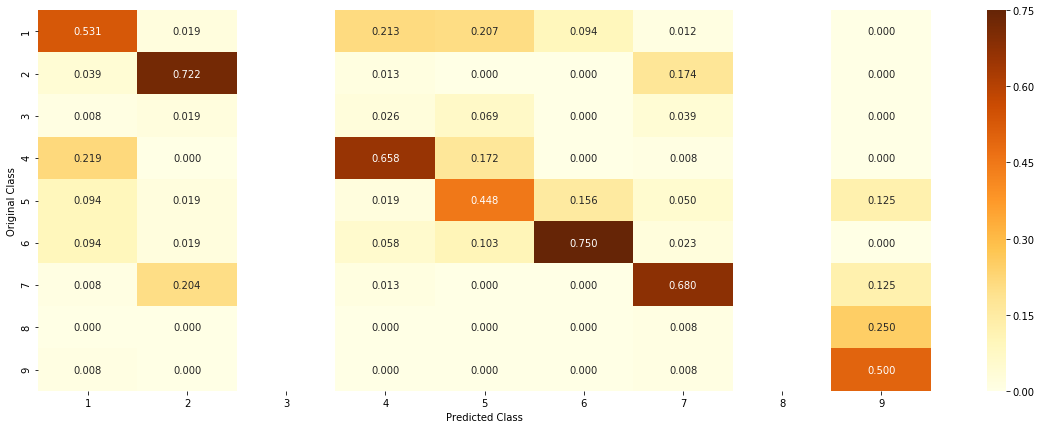

-------------------- Recall matrix (Row sum=1) --------------------


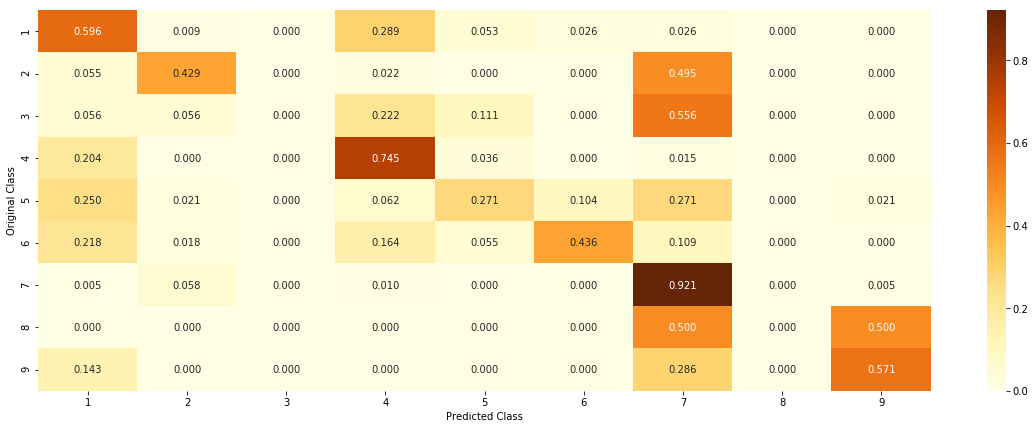

In [85]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(x_tr_tfidf_onehotencoding, y_train)
log_loss_tr = log_loss(y_train, vclf.predict_proba(x_tr_tfidf_onehotencoding))
log_loss_te = log_loss(y_test, vclf.predict_proba(x_te_tfidf_onehotencoding))
log_loss_cv = log_loss(y_cv, vclf.predict_proba(x_cv_tfidf_onehotencoding))
print("Log loss (train) on the VotingClassifier :",log_loss_tr )
print("Log loss (CV) on the VotingClassifier :",log_loss_cv )
print("Log loss (test) on the VotingClassifier :",log_loss_te )
print("Number of missclassified point :", np.count_nonzero((vclf.predict(x_te_tfidf_onehotencoding)- y_test)) *100/y_test.shape[0])
plot_confusion_matrix(y_test,vclf.predict(x_te_tfidf_onehotencoding))

In [86]:
results.update({'10' : {'Model' : 'maximum voting classifier ',
                       'Train Error':log_loss_tr,
                        'Test Error' : log_loss_te, 
                        'Cv Error':log_loss_cv,
                        'Misclassification':np.count_nonzero((stack_clf.predict(x_te_tfidf_onehotencoding)-
                                                              y_test))*100/y_test.shape[0]}})

<h3>4.7.4 Results  </h3>

In [125]:
### Pretty table 
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model Name","Train Loss","TestLoss","CvLoss","BestAlpha","%MisClass" ]
x.add_row([results['1']['Model'],round(results['1']['Train Error'],3),round(results['1']['Test Error'],3),round(results['1']['Cv Error'],3),None,round(results['1']['Misclassification'],3)])
x.add_row([results['2']['Model'],round(results['2']['Train Error'],3),round(results['2']['Test Error'],3),round(results['2']['Cv Error'],3),results['2']['best_alpha'],round(results['2']['Misclassification'],3)])
x.add_row([results['3']['Model'],round(results['3']['Train Error'],3),round(results['3']['Test Error'],3),round(results['3']['Cv Error'],3),results['3']['best_alpha'],round(results['3']['Misclassification'],3)])
x.add_row([results['4']['Model'],round(results['4']['Train Error'],3),round(results['4']['Test Error'],3),round(results['4']['Cv Error'],3),results['4']['best_alpha'],round(results['4']['Misclassification'],3)])
x.add_row([results['5']['Model'],round(results['5']['Train Error'],3),round(results['5']['Test Error'],3),round(results['5']['Cv Error'],3),results['5']['best_alpha'],round(results['5']['Misclassification'],3)])
x.add_row([results['6']['Model'],round(results['6']['Train Error'],3),round(results['6']['Test Error'],3),round(results['6']['Cv Error'],3),results['6']['best_alpha'],round(results['6']['Misclassification'],3)])
x.add_row([results['7']['Model'],round(results['7']['Train Error'],3),round(results['7']['Test Error'],3),round(results['7']['Cv Error'],3),results['7']['best_alpha'],round(results['7']['Misclassification'],3)])
x.add_row([results['8']['Model'],round(results['8']['Train Error'],3),round(results['8']['Test Error'],3),round(results['8']['Cv Error'],3),results['8']['bestalpha'],round(results['8']['Misclassification'],3)])
x.add_row([results['9']['Model'],round(results['9']['Train Error'],3),round(results['9']['Test Error'],3),round(results['9']['Cv Error'],3),results['9']['bestalpha'],round(results['9']['Misclassification'],3)])
x.add_row([results['10']['Model'],round(results['10']['Train Error'],3),round(results['10']['Test Error'],3),round(results['10']['Cv Error'],3),None,round(results['10']['Misclassification'],3)])
print(x)

+----------------------------------------+------------+----------+--------+------------+-----------+
|               Model Name               | Train Loss | TestLoss | CvLoss | BestAlpha  | %MisClass |
+----------------------------------------+------------+----------+--------+------------+-----------+
|                 Random                 |   2.492    |  2.451   | 2.469  |    None    |   88.722  |
|             Multinomial NB             |   0.548    |  1.187   |  1.21  |    0.01    |   37.782  |
|                  KNN                   |   0.831    |  1.051   |  1.1   |     41     |   37.97   |
|  Logistic Regresssion with balancing   |    0.84    |  1.154   | 1.123  |     10     |   38.91   |
| Logistic Regresssion without balancing |   0.828    |  1.158   | 1.119  |     10     |   37.218  |
|               Linear SVM               |   0.323    |  1.028   | 1.054  |   0.0001   |   36.842  |
|      RandomForest-onehotencoding       |   0.485    |  1.024   |  1.03  | (2000, 10) |   

<h4 align='center'> '' We can see that Linear SVM performs better on the test data compared to other models ''  </h4>

### 4.7.5 Feature Engineering  
    Steps:
    * Creating new features and training the best model 'Linear SVM' with engineered features
    * Observe log-loss reduction.
    Ref : https://www.kaggle.com/osciiart/redefining-treatment-0-57456-modified,
    https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

In [93]:
## number of words,geneshare,variationshare,len(text),average_words
def average_words(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

##gene share : the gene name present in the text feature
x_train['Gene_Share'] = x_train.apply(lambda x: sum(
    [1 for i in x['TEXT'].strip().lower().split() if i == x['Gene'].strip().lower()]),axis=1)
x_test['Gene_Share'] =  x_test.apply(lambda x: sum(
    [1 for i in x['TEXT'].strip().lower().split() if i == x['Gene'].strip().lower()]),axis=1)
x_cv['Gene_Share'] = x_cv.apply(lambda x: sum(
    [1 for i in x['TEXT'].strip().lower().split() if i == x['Gene'].strip().lower()]),axis=1)   
print('Gene Share')
#variation share : the variation name present in the text feature
x_train['Variation_Share'] = x_train.apply(lambda x: sum(
    [1 for i in x['TEXT'].strip().lower().split() if i == x['Variation'].strip().lower()]),axis=1)
x_test['Variation_Share'] =  x_test.apply(lambda x: sum(
    [1 for i in x['TEXT'].strip().lower().split() if i == x['Variation'].strip().lower()]),axis=1)
x_cv['Variation_Share'] = x_cv.apply(lambda x: sum(
    [1 for i in x['TEXT'].strip().lower().split() if i == x['Variation'].strip().lower()]),axis=1)
print('Variation Share')
#number of words : count of words in text
x_train['word_count'] = x_train['TEXT'].apply(lambda x : len(x.strip().split()))
x_test['word_count'] = x_test['TEXT'].apply(lambda x : len(x.strip().split()))
x_cv['word_count'] = x_cv['TEXT'].apply(lambda x : len(x.strip().split()))
print('Number of Words')
## average words: average of words in the text
x_train['average_words'] = x_train['TEXT'].apply(lambda x : average_words(x))
x_test['average_words'] = x_test['TEXT'].apply(lambda x : average_words(x))
x_cv['average_words'] = x_cv['TEXT'].apply(lambda x : average_words(x))
print('Average Words')
## text_len : length of the text feature
x_train['text_len'] = x_train['TEXT'].apply(lambda x : len(x.strip()))
x_test['text_len'] = x_test['TEXT'].apply(lambda x : len(x.strip()))
x_cv['text_len'] = x_cv['TEXT'].apply(lambda x : len(x.strip()))
print('Text length')

Gene Share
Variation Share
Number of Words
Average Words
Text length


#### 4.7.5.1 Normalizing all the numerical features 

In [100]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

# normalizer.fit(x_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['Gene_Share'].values.reshape(1,-1))

Gene_Share_train_norm = normalizer.transform(x_train['Gene_Share'].values.reshape(1,-1))
Gene_Share_cv_norm = normalizer.transform(x_cv['Gene_Share'].values.reshape(1,-1))
Gene_Share_test_norm = normalizer.transform(x_test['Gene_Share'].values.reshape(1,-1))

print("After vectorizations")
print(Gene_Share_train_norm.shape, y_train.shape)
print(Gene_Share_cv_norm.shape, y_cv.shape)
print(Gene_Share_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
Gene_Share_train_norm=Gene_Share_train_norm.reshape(-1,1)
Gene_Share_cv_norm=Gene_Share_cv_norm.reshape(-1,1)
Gene_Share_test_norm=Gene_Share_test_norm.reshape(-1,1)

After vectorizations
(1, 2124) (2124,)
(1, 532) (532,)
(1, 665) (665,)


In [102]:
normalizer = Normalizer()

# normalizer.fit(x_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['Variation_Share'].values.reshape(1,-1))

Variation_Share_train_norm = normalizer.transform(x_train['Variation_Share'].values.reshape(1,-1))
Variation_Share_cv_norm = normalizer.transform(x_cv['Variation_Share'].values.reshape(1,-1))
Variation_Share_test_norm = normalizer.transform(x_test['Variation_Share'].values.reshape(1,-1))

print("After vectorizations")
print(Variation_Share_train_norm.shape, y_train.shape)
print(Variation_Share_cv_norm.shape, y_cv.shape)
print(Variation_Share_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
Variation_Share_train_norm=Variation_Share_train_norm.reshape(-1,1)
Variation_Share_cv_norm=Variation_Share_cv_norm.reshape(-1,1)
Variation_Share_test_norm=Variation_Share_test_norm.reshape(-1,1)

After vectorizations
(1, 2124) (2124,)
(1, 532) (532,)
(1, 665) (665,)


In [108]:
normalizer = Normalizer()

# normalizer.fit(x_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['word_count'].values.reshape(1,-1))

word_count_train_norm = normalizer.transform(x_train['word_count'].values.reshape(1,-1))
word_count_cv_norm = normalizer.transform(x_cv['word_count'].values.reshape(1,-1))
word_count_test_norm = normalizer.transform(x_test['word_count'].values.reshape(1,-1))

print("After vectorizations")
print(word_count_train_norm.shape, y_train.shape)
print(word_count_cv_norm.shape, y_cv.shape)
print(word_count_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
word_count_train_norm=word_count_train_norm.reshape(-1,1)
word_count_cv_norm=word_count_cv_norm.reshape(-1,1)
word_count_test_norm=word_count_test_norm.reshape(-1,1)

After vectorizations
(1, 2124) (2124,)
(1, 532) (532,)
(1, 665) (665,)


In [107]:
normalizer = Normalizer()

# normalizer.fit(x_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['average_words'].values.reshape(1,-1))

average_words_train_norm = normalizer.transform(x_train['average_words'].values.reshape(1,-1))
average_words_cv_norm = normalizer.transform(x_cv['average_words'].values.reshape(1,-1))
average_words_test_norm = normalizer.transform(x_test['average_words'].values.reshape(1,-1))

print("After vectorizations")
print(average_words_train_norm.shape, y_train.shape)
print(average_words_cv_norm.shape, y_cv.shape)
print(average_words_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
average_words_train_norm=average_words_train_norm.reshape(-1,1)
average_words_cv_norm=average_words_cv_norm.reshape(-1,1)
average_words_test_norm=average_words_test_norm.reshape(-1,1)

After vectorizations
(1, 2124) (2124,)
(1, 532) (532,)
(1, 665) (665,)


In [106]:
normalizer = Normalizer()

# normalizer.fit(x_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['text_len'].values.reshape(1,-1))

text_len_train_norm = normalizer.transform(x_train['text_len'].values.reshape(1,-1))
text_len_cv_norm = normalizer.transform(x_cv['text_len'].values.reshape(1,-1))
text_len_test_norm = normalizer.transform(x_test['text_len'].values.reshape(1,-1))

print("After vectorizations")
print(text_len_train_norm.shape, y_train.shape)
print(text_len_cv_norm.shape, y_cv.shape)
print(text_len_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
text_len_train_norm=text_len_train_norm.reshape(-1,1)
text_len_cv_norm=text_len_cv_norm.reshape(-1,1)
text_len_test_norm=text_len_test_norm.reshape(-1,1)

After vectorizations
(1, 2124) (2124,)
(1, 532) (532,)
(1, 665) (665,)


#### 4.7.5.2 Stacking the Features

In [115]:
##

### hstacking using tfidf
x_tr_tfidf_onehotencoding1 = hstack((ohe_tr_gene,ohe_tr_variation,tfidf_tr_ohe,
                             Gene_Share_train_norm,
                             Variation_Share_train_norm,
                             word_count_train_norm,
                            average_words_train_norm,
                             text_len_train_norm)).tocsr()
x_te_tfidf_onehotencoding1 = hstack((ohe_te_gene,ohe_te_variation,tfidf_te_ohe,
                             Gene_Share_test_norm,
                             Variation_Share_test_norm,
                             word_count_test_norm,
                            average_words_test_norm,
                             text_len_test_norm)).tocsr()
x_cv_tfidf_onehotencoding1 = hstack((ohe_cv_gene,ohe_cv_variation,tfidf_cv_ohe,
                             Gene_Share_cv_norm,
                             Variation_Share_cv_norm,
                             word_count_cv_norm,
                             average_words_cv_norm,
                             text_len_cv_norm)).tocsr()


#### 4.7.5.3 Training Linear SVM

Linear SVM trained with alpha  1e-06  with a log_loss of 1.1162622305
Linear SVM trained with alpha  1e-05  with a log_loss of 1.03256427519
Linear SVM trained with alpha  0.0001  with a log_loss of 0.98782905586
Linear SVM trained with alpha  0.001  with a log_loss of 1.04343276258
Linear SVM trained with alpha  0.01  with a log_loss of 1.22393523502
Linear SVM trained with alpha  0.1  with a log_loss of 1.46522822407
Linear SVM trained with alpha  1  with a log_loss of 1.57288305674
Linear SVM trained with alpha  10  with a log_loss of 1.58730363315
Linear SVM trained with alpha  100  with a log_loss of 1.5889353051


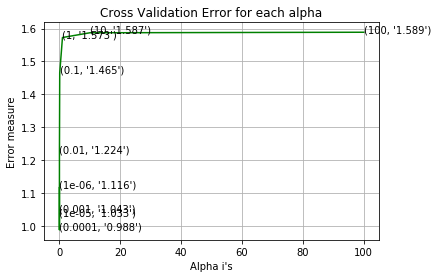

For values of best alpha =  0.0001 The train log loss is: 0.401086988749
For values of best alpha =  0.0001 The test log loss is: 0.973319905796
For values of best alpha =  0.0001 The cross validation log loss is: 0.98782905586


In [118]:
alpha = [10 ** i for i in range(-6,3)]
cv_log_error = []
for i in alpha :
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l2', loss='log', random_state=42)
    ## trained after tfidf vectorizing on text data
    clf.fit(x_tr_tfidf_onehotencoding1,y_train)
    sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(x_tr_tfidf_onehotencoding1,y_train)
    predict_cv = sig_clf.predict_proba(x_cv_tfidf_onehotencoding1)
    print('Linear SVM trained with alpha ',i,' with a log_loss of',log_loss(y_cv,predict_cv,
                                                                 labels=sig_clf.classes_, eps=1e-15))
    cv_log_error.append(log_loss(y_cv,predict_cv,labels=sig_clf.classes_, eps=1e-15))
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error,c='g')
for i, txt in enumerate(np.round(cv_log_error,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


### train the alpha with best parameter
best_alpha = np.argmin(cv_log_error)
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_tr_tfidf_onehotencoding1, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_tr_tfidf_onehotencoding1, y_train)

predict_y_tr = sig_clf.predict_proba(x_tr_tfidf_onehotencoding1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_te = sig_clf.predict_proba(x_te_tfidf_onehotencoding1)
print('For values of best alpha = ', alpha[best_alpha], 
      "The test log loss is:",log_loss(y_test, predict_y_te, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(x_cv_tfidf_onehotencoding1)
print('For values of best alpha = ', alpha[best_alpha], 
      "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))


% of missclassified point : 35.714285714285715
-------------------- Confusion matrix --------------------


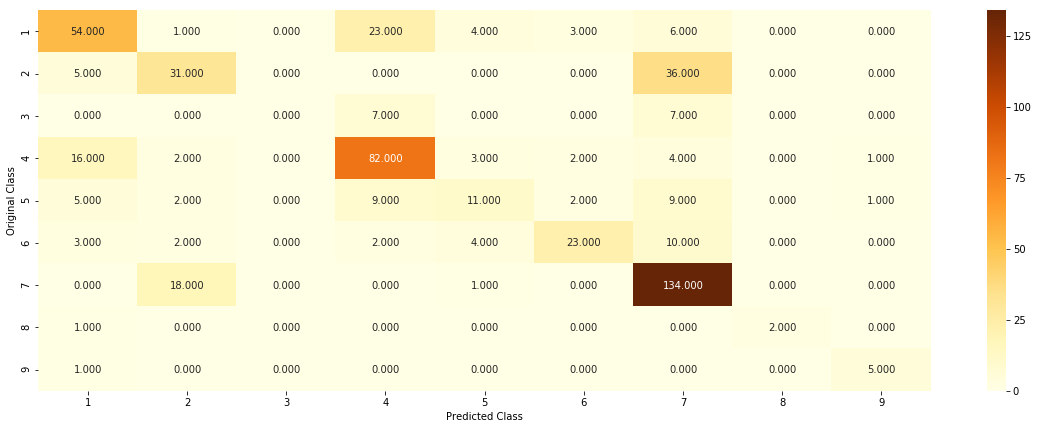

-------------------- Precision matrix (Columm Sum=1) --------------------


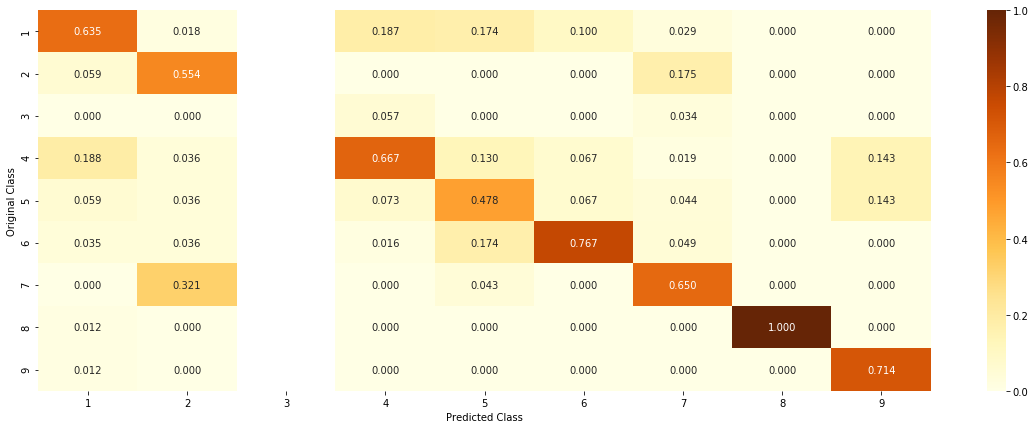

-------------------- Recall matrix (Row sum=1) --------------------


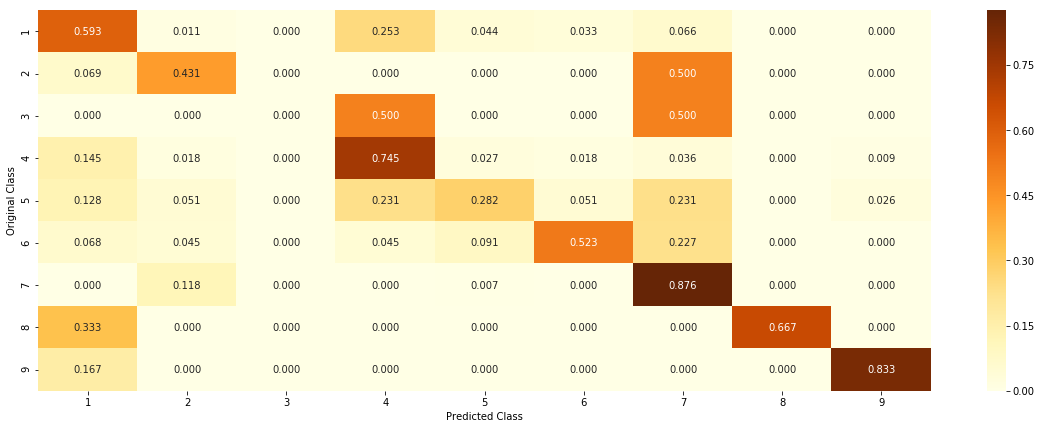

In [119]:
# to avoid rounding error while multiplying probabilites we use log-probability estimates
mis_cls = np.count_nonzero((sig_clf.predict(x_cv_tfidf_onehotencoding1)- y_cv))*100 /len(y_cv)
print("% of missclassified point :", mis_cls)
plot_confusion_matrix(y_cv, sig_clf.predict(x_cv_tfidf_onehotencoding1.toarray()))

## Conclusion

##### 1. We see that out of all the models 'Linear SVM' performs better than other models on test,cv an train data 
##### 2. Training Linear SVM and  adding new features like : gene share,variation share,text length,average word etc it is observed that cv and test loss reduces below 1. 

In [131]:
### Pretty table 
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model Name","TestLoss","CvLoss","BestAlpha","%MisClass" ]
x.add_row([results['6']['Model'],round(results['6']['Test Error'],3),round(results['6']['Cv Error'],3),results['6']['best_alpha'],round(results['6']['Misclassification'],3)])
x.add_row(['Linear SVM with feature Engineering',0.97,0.98,0.0001,35.7])
print(x)

+-------------------------------------+----------+--------+-----------+-----------+
|              Model Name             | TestLoss | CvLoss | BestAlpha | %MisClass |
+-------------------------------------+----------+--------+-----------+-----------+
|              Linear SVM             |  1.028   | 1.054  |   0.0001  |   36.842  |
| Linear SVM with feature Engineering |   0.97   |  0.98  |   0.0001  |    35.7   |
+-------------------------------------+----------+--------+-----------+-----------+
